# R_google

In [1]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:

# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [3]:
# If ts not available we need to install . put other packages if you need.
packages <- c("googledrive", "googlesheets4")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))  
}

In [4]:
library("googledrive")
library("googlesheets4")


Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make




In [5]:
# call authentication forcing interactive login and save in cache. 
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AY0e-g5rYYFeSmlRDQ6nUuYfzJSoX7u60vt4jRFc36YluTnczbt3_0SSL7c


# load & pre-process data 

In [6]:
system("ls", TRUE)

[1] "sample_data"

In [7]:
# https://drive.google.com/file/d/1CbSlBkB_nJEvW0W_efOY5a6WkKDC7Bp6/view?usp=sharing
system("gdown --id 1CbSlBkB_nJEvW0W_efOY5a6WkKDC7Bp6") #doc_annotated_lsa.csv

# https://drive.google.com/file/d/1IKB0Zc1MvYFgNyo3Yror_dBKQvRsrypU/view?usp=sharing
system("gdown --id 1IKB0Zc1MvYFgNyo3Yror_dBKQvRsrypU") #stopword




#https://drive.google.com/file/d/1oMmhYjjGB1Rq45phkKC4X718w8A3w_-d/view?usp=sharing
system("gdown --id 1oMmhYjjGB1Rq45phkKC4X718w8A3w_-d") #clean_corpus_df

In [8]:
doc = readr::read_csv("doc_annotated_lsa.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  docid = col_character(),
  text = col_character()
)




In [9]:
doc_clean = readr::read_csv("clean_corpus_df.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  docid = col_character(),
  text = col_character()
)




In [ ]:
head(doc_clean)

X1 docid     
1 0  weibo_1_T1
2 1  weibo_2_T1
3 2  weibo_3_T1
4 3  weibo_4_T1
5 4  weibo_5_T1
6 5  weibo_6_T1
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1 五一勞動 人民 光榮 上 了 一天 課 的 自己 也 不錯 太久 沒有 活動 的 身體 跟着 中專 孩子 耗 了 兩個 小時 後 的 結果 就是 全身 痠痛 捂臉 一 覺醒 來 茗茶 恰煙 在 扉頁 中 尋覓 心蝶 的 停歇 再 打開 倒背如流 的 美食 紀錄片 一邊 回憶 着 臺灣 的 美食 一邊 喫 着 今天 的 第一餐 讓 疲憊 在 舌尖 上 愉悅 了 時光 這個 熊本 料理 也 算 拉薩 比較 道 地 的 味道 了 只不過 三文魚 腩 應該 是 瘦子 魚 的 魚腩 吧 所謂 大 的 北極 貝 跟 一級 棒 的 一 比較 就 小巫見大巫 了                                                                                                                                     
2 臺灣 連 六天 今日 無 新增 病例 維持 案 連續 天零 確診 流行 疫情 指揮中心 日 公佈 臺灣 無 新增 病例 個案 維持 例 其中 例 境外 移入 例 本土 病例 及 例 敦睦 艦隊 這 也 是 臺灣 連續 天 沒有 新增 本土 個案 像是 預告 此 好消息 在 記者會 開始 之前 就 已經 有 顆大 西瓜 送 至 指揮中心 現場                                                                                                                                                                                                                                                                                                             
3 正宗 臺灣 風味 手 抓 餅 原味 家庭裝 片 大餅 送 包醬 免郵 手工 煎餅 美食 分享 正宗 臺灣 風味 手 抓 餅 原味 家庭裝 片 大餅 送 包醬 免郵 手工 煎餅                                                                                                                                                                                                                                                                                                                                                                                                                                                       
4 高以翔 高以翔 我們 永遠 不說 再見 在 鎂光燈 的 工作 不管 是 以 模特兒 或是 演員 的 身份 我 都 覺得 相當 的 有趣 因爲 這 讓 我 從 不同 的 角度 體驗 這個 世界 我 在 臺灣 的 演藝 工作 剛 開始 遇到 不少 困難 因爲 我 的 中文 並 不 標準 所以 造成 許多 溝通 的 障礙 或 像是 他太高 了 他 的 形象 不 合適 等 但 我 從來不 讓 這些 反對 的 聲音 阻礙 我 因爲 我 就是 我 高以翔 想 說 你 真的 很 了不起 克服 了 這麼 多 的 困難 用 樂觀 積極 的 心態 直面 挑戰 活出 了 屬於 自己 的 精彩 人生 重複 重複 再 重複 追憶 他 的 似水 年華 讓 的 精神 永遠 活在 我們 的 心中 高以翔 尋覓 你 的 氣息 的 微博 視頻
5 臺灣 一位 幾歲 的 青年 竟然 將 自由 視爲 這麼 重要 的 東西 就 跟 我們 從小 接受 愛國主義 教育 一樣 心中 有 國家 民族 觀念 有 民族 凝聚力 但 三觀 這個 東西 從小 便 在 大 環境 中 潛移默化 的 形成 現在 有點 根深蒂固 和平統一 有點 不切實際                                                                                                                                                                                                                                                                                                                                                           
6 也 可能 是 感冒 嚴重 加劇 了 情緒 負面 總之 向林 爸爸 學習 啦 這句 話 打 的 時候 腦子裏 是 臺灣 腔 我 一定 要 挖掘 出來 我 能夠 熱愛 的 東西 哪怕 好色 呢 我 真的 是 麻將 都 不 熱愛 的 中國 人 煩死 了 竟然 想到 頭 禿 沒想到 我 的 星星之火 在 哪裏

In [ ]:
colnames(doc_clean)

[1] "X1"    "docid" "text"

In [10]:
doc_clean$X1 <- NULL #drop col

In [11]:
colnames(doc_clean) = c("doc_id","text") 

In [12]:
doc_clean

doc_id      
1      weibo_1_T1  
2      weibo_2_T1  
3      weibo_3_T1  
4      weibo_4_T1  
5      weibo_5_T1  
6      weibo_6_T1  
7      weibo_7_T1  
8      weibo_8_T1  
9      weibo_9_T1  
10     weibo_10_T1 
11     weibo_11_T1 
12     weibo_12_T1 
13     weibo_13_T1 
14     weibo_14_T1 
15     weibo_15_T1 
16     weibo_16_T1 
17     weibo_17_T1 
18     weibo_18_T1 
19     weibo_19_T1 
20     weibo_20_T1 
21     weibo_21_T1 
22     weibo_22_T1 
23     weibo_23_T1 
24     weibo_24_T1 
25     weibo_25_T1 
26     weibo_26_T1 
27     weibo_27_T1 
28     weibo_28_T1 
29     weibo_29_T1 
30     weibo_30_T1 
⋮      ⋮           
134796 ptt_31471_T9
134797 ptt_31472_T9
134798 ptt_31473_T9
134799 ptt_31474_T9
134800 ptt_31475_T9
134801 ptt_31476_T9
134802 ptt_31477_T9
134803 ptt_31478_T9
134804 ptt_31479_T9
134805 ptt_31480_T9
134806 ptt_31481_T9
134807 ptt_31482_T9
134808 ptt_31483_T9
134809 ptt_31484_T9
134810 ptt_31485_T9
134811 ptt_31486_T9
134812 ptt_31487_T9
134813 ptt_31488_T9
134814 ptt_31489_T9
134815 ptt_31490_T9
134816 ptt_31491_T9
134817 ptt_31492_T9
134818 ptt_31493_T9
134819 ptt_31494_T9
134820 ptt_31495_T9
134821 ptt_31496_T9
134822 ptt_31497_T9
134823 ptt_31498_T9
134824 ptt_31499_T9
134825 ptt_31500_T9
       text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

# Install packages

In [14]:
# clean current workspace
#rm(list=ls(all=T))
# set options
options(stringsAsFactors = F)         # no automatic data transformation
options("scipen" = 100, "digits" = 4) # supress math annotation
# install libraries

install.packages(c("tm","reshape2", "ggplot2", "pals","showtext","tidytext","stm","quanteda.textstats","dplyr","tidyverse","tidyr","quanteda","broom"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘ISOcodes’, ‘NLP’, ‘slam’, ‘plyr’, ‘dichromat’, ‘mapproj’, ‘maps’, ‘sysfonts’, ‘showtextdb’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’, ‘glmnet’, ‘lda’, ‘matrixStats’, ‘quadprog’, ‘RcppArmadillo’, ‘nsyllable’, ‘proxyC’, ‘RcppParallel’, ‘fastmatch’, ‘SnowballC’, ‘stopwords’




In [15]:
system("apt install libgsl-dev", intern=TRUE)
install.packages("topicmodels")


[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘modeltools’




In [16]:
# load libraries

library(broom)
library(tm)
library(topicmodels)
library(reshape2)
library(ggplot2)
library(pals)
library(showtext)
library(tidytext)
library(stm)
library(dplyr)
library(quanteda.textstats)
library(tidyverse)
library(tidyr)
library(quanteda)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:httr’:

    content



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


Loading required package: sysfonts

Loading required package: showtextdb

stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggp

# tm package: corpus

In [17]:
#build corpus step 1 
(ds<-DataframeSource(doc_clean))

$encoding
[1] ""

$length
[1] 134825

$position
[1] 0

$reader
function (elem, language, id) 
{
    PlainTextDocument(elem$content[, "text"], id = elem$content[, 
        "doc_id"], language = language)
}
<bytecode: 0x55cb2956c510>
<environment: namespace:tm>

$content
# A tibble: 134,825 x 2
   doc_id      text                                                             
   <chr>       <chr>                                                            
 1 weibo_1_T1  五一勞動 人民 光榮 上 了 一天 課 的 自己 也 不錯 太久 沒有 活動 …
 2 weibo_2_T1  臺灣 連 六天 今日 無 新增 病例 維持 案 連續 天零 確診 流行 疫情 …
 3 weibo_3_T1  正宗 臺灣 風味 手 抓 餅 原味 家庭裝 片 大餅 送 包醬 免郵 手工 煎…
 4 weibo_4_T1  高以翔 高以翔 我們 永遠 不說 再見 在 鎂光燈 的 工作 不管 是 以 … 
 5 weibo_5_T1  臺灣 一位 幾歲 的 青年 竟然 將 自由 視爲 這麼 重要 的 東西 就 跟…
 6 weibo_6_T1  也 可能 是 感冒 嚴重 加劇 了 情緒 負面 總之 向林 爸爸 學習 啦 這…
 7 weibo_7_T1  陪 我 媽 斷斷續續 看 了 幾 集成化 十四年 太爛 了 太爛 了 劇情 簡…
 8 weibo_8_T1  舅媽 真的 是 太好了 呀 就 因爲 我 說 一句 想 做 壽司 就 早早 起… 
 9 weibo_9_T1  臺灣 網軍 橫行 阿                                                
10 weibo_10_T1 我 在 看 

In [18]:
#build corpus step 2
corpus<- VCorpus(ds)

In [19]:
head(corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 6

# DTM

In [20]:
# compute document term matrix with terms >= minimumFrequency
minimumFrequency <- 5
DTM <- DocumentTermMatrix(corpus, control = list(bounds = list(global = c(minimumFrequency, Inf))))
# have a look at the number of documents and terms in the matrix
dim(DTM)
#清過的資料 用 vcorpus
#134825  24809

[1] 134825  24809

In [21]:
#remove empty row af dtm
sel_idx <- slam::row_sums(DTM) > 0
DTM <- DTM[sel_idx, ]
doc_dtm <- doc_clean[sel_idx, ] 

#Visualization : 不同語料來源 相關主題詞彙


In [ ]:

top_terms_by_topic_tfidf <- function(text_df, text_column, group_column, plot = T){
    # name for the column we're going to unnest_tokens_ to
    # (you only need to worry about enquo stuff if you're
    # writing a function using using tidyverse packages)
    group_column <- enquo(group_column)
    text_column <- enquo(text_column)
    
    # get the count of each word in each review
    words <- text_df %>%
      unnest_tokens(word, !!text_column) %>%
      count(!!group_column, word) %>% 
      ungroup()

    # get the number of words per text
    total_words <- words %>% 
      group_by(!!group_column) %>% 
      summarize(total = sum(n))

    # combine the two dataframes we just made
    words <- left_join(words, total_words)

    # get the tf_idf & order the words by degree of relevence
    tf_idf <- words %>%
      bind_tf_idf(word, !!group_column, n) %>%
      select(-total) %>%
      arrange(desc(tf_idf)) %>%
      mutate(word = factor(word, levels = rev(unique(word))))
    
    if(plot == T){
        # convert "group" into a quote of a name
        # (this is due to funkiness with calling ggplot2
        # in functions)
        group_name <- quo_name(group_column)
        
        # plot the 10 most informative terms per topic
        tf_idf %>% 
          group_by(!!group_column) %>% 
          top_n(10) %>% 
          ungroup %>%
          ggplot(aes(word, tf_idf, fill = as.factor(group_name))) +
          geom_col(show.legend = FALSE) +
          labs(x = NULL, y = "tf-idf") +
          theme(text = element_text(size=25),axis.title=element_text(size=24,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1)) +
          facet_wrap(reformulate(group_name), scales = "free") +
          coord_flip()
    }else{
        # return the entire tf_idf dataframe
        return(tf_idf)
    }
}



In [ ]:
doc_dtm_group <- doc_dtm %>% group_by(group = substr(doc_id, 1, 3))
doc_dtm_group

doc_id      
1      weibo_1_T1  
2      weibo_2_T1  
3      weibo_3_T1  
4      weibo_4_T1  
5      weibo_5_T1  
6      weibo_6_T1  
7      weibo_7_T1  
8      weibo_8_T1  
9      weibo_10_T1 
10     weibo_11_T1 
11     weibo_12_T1 
12     weibo_13_T1 
13     weibo_14_T1 
14     weibo_15_T1 
15     weibo_16_T1 
16     weibo_18_T1 
17     weibo_19_T1 
18     weibo_21_T1 
19     weibo_22_T1 
20     weibo_23_T1 
21     weibo_25_T1 
22     weibo_27_T1 
23     weibo_28_T1 
24     weibo_30_T1 
25     weibo_31_T1 
26     weibo_32_T1 
27     weibo_35_T1 
28     weibo_36_T1 
29     weibo_37_T1 
30     weibo_38_T1 
⋮      ⋮           
117888 ptt_31471_T9
117889 ptt_31472_T9
117890 ptt_31473_T9
117891 ptt_31474_T9
117892 ptt_31475_T9
117893 ptt_31476_T9
117894 ptt_31477_T9
117895 ptt_31478_T9
117896 ptt_31479_T9
117897 ptt_31480_T9
117898 ptt_31481_T9
117899 ptt_31482_T9
117900 ptt_31483_T9
117901 ptt_31484_T9
117902 ptt_31485_T9
117903 ptt_31486_T9
117904 ptt_31487_T9
117905 ptt_31488_T9
117906 ptt_31489_T9
117907 ptt_31490_T9
117908 ptt_31491_T9
117909 ptt_31492_T9
117910 ptt_31493_T9
117911 ptt_31494_T9
117912 ptt_31495_T9
117913 ptt_31496_T9
117914 ptt_31497_T9
117915 ptt_31498_T9
117916 ptt_31499_T9
117917 ptt_31500_T9
       text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Joining, by = "group"

Selecting by tf_idf



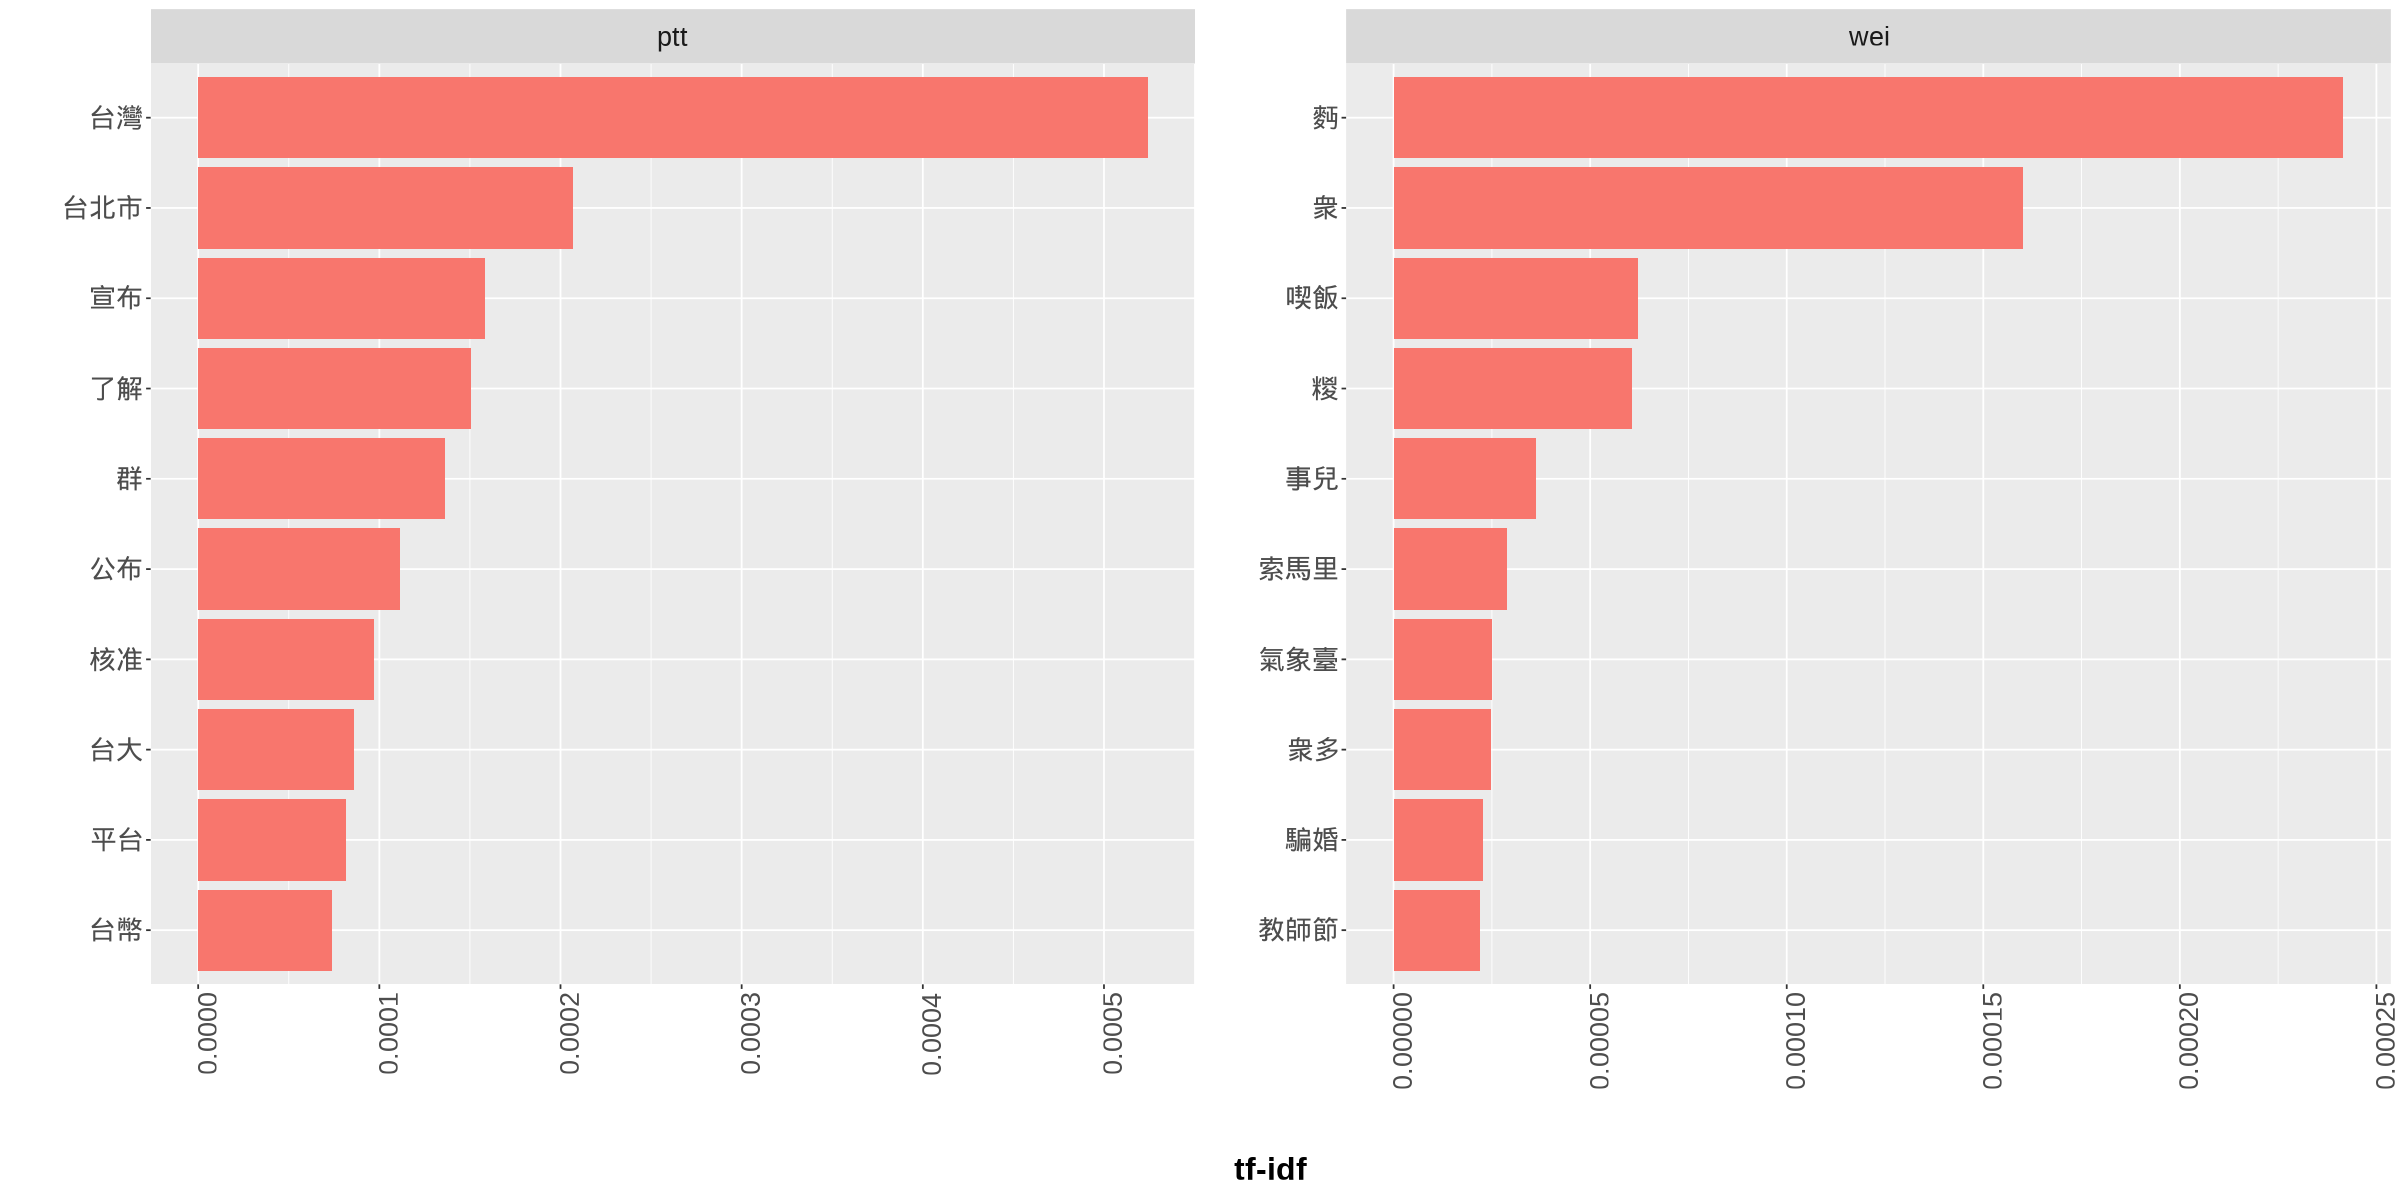

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
top_terms_by_topic_tfidf(text_df = doc_dtm_group, # dataframe
                         text_column = text, # column with text
                         group_column = group, # column with topic label
                         plot = T) # return a plot

#Visualization :不同時間點 相關主題詞彙

In [ ]:
doc_dtm_group<- doc_dtm_group %>% group_by(time = time)
doc_dtm_group

Joining, by = "time"

Selecting by tf_idf



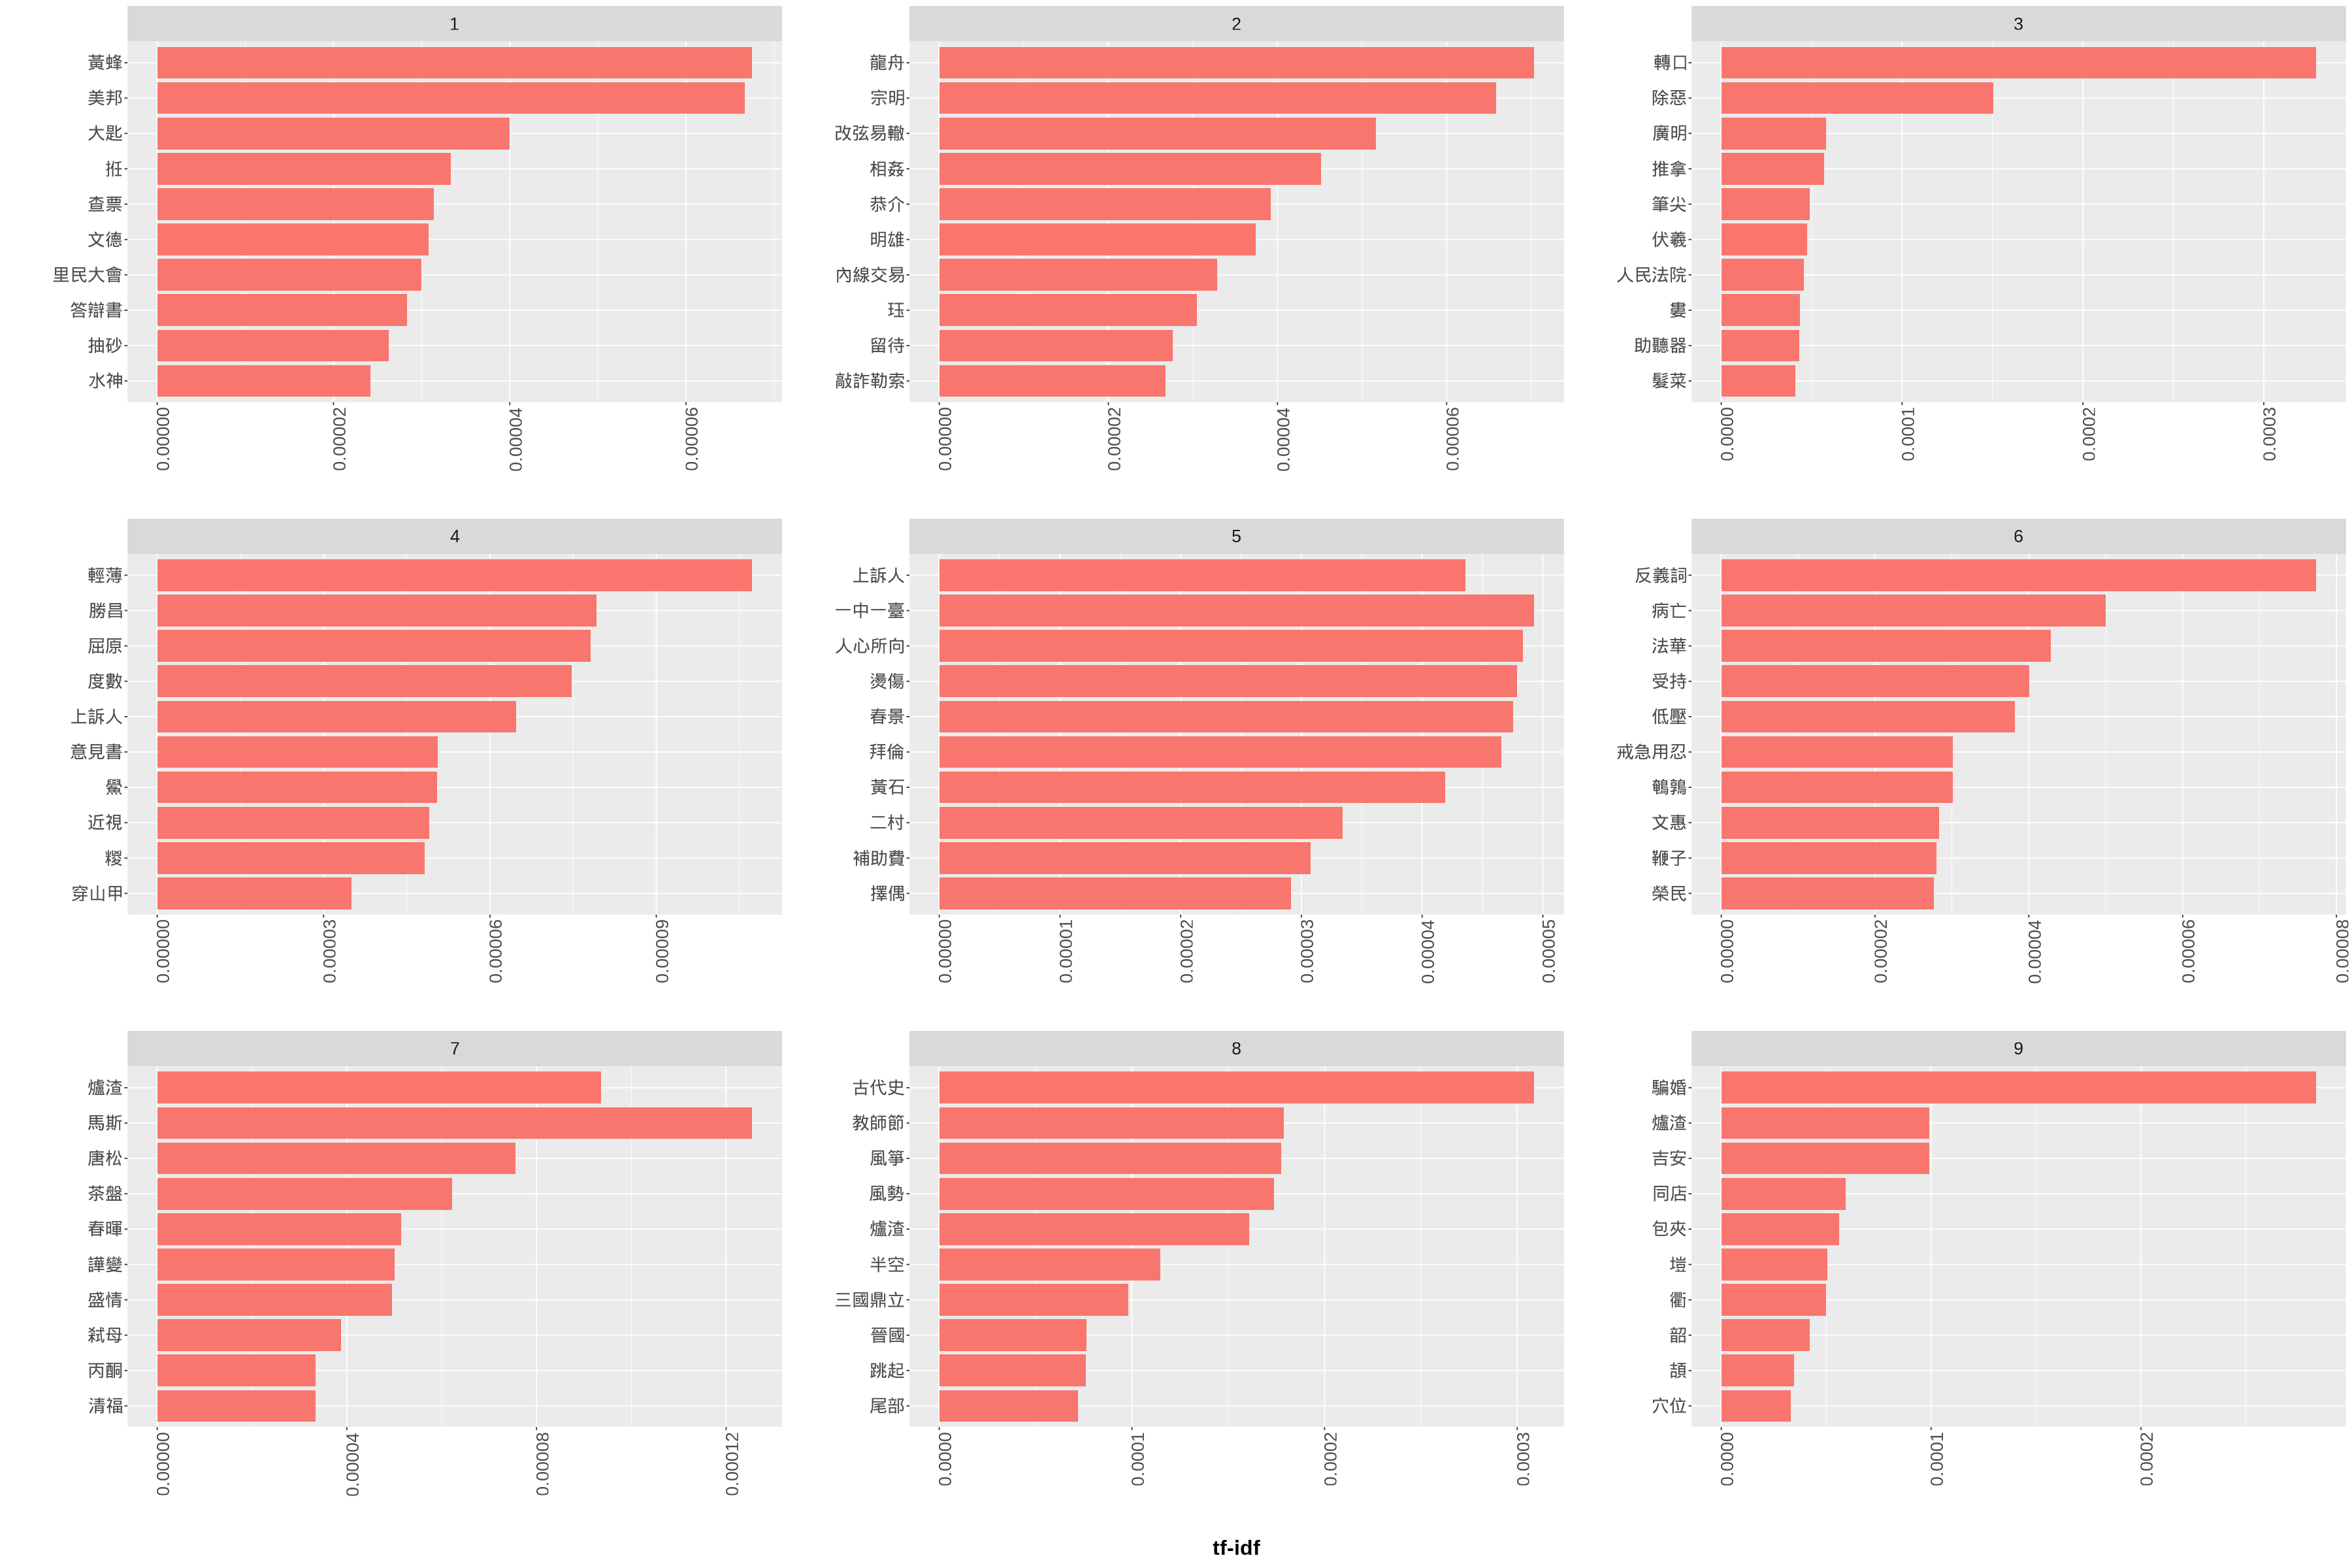

In [ ]:
#每個時間點的主題詞彙
options(repr.plot.width=30, repr.plot.height=20)
top_terms_by_topic_tfidf(text_df = doc_dtm_group, # dataframe
                         text_column = text, # column with text
                         group_column = time, # column with topic label
                         plot = T) # return a plot

# LDA funciton: Perplexity and word distribution in each topic 

In [ ]:
library(tidyverse)
n_topics <- c(2, 4, 8, 12, 16, 20, 24)

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


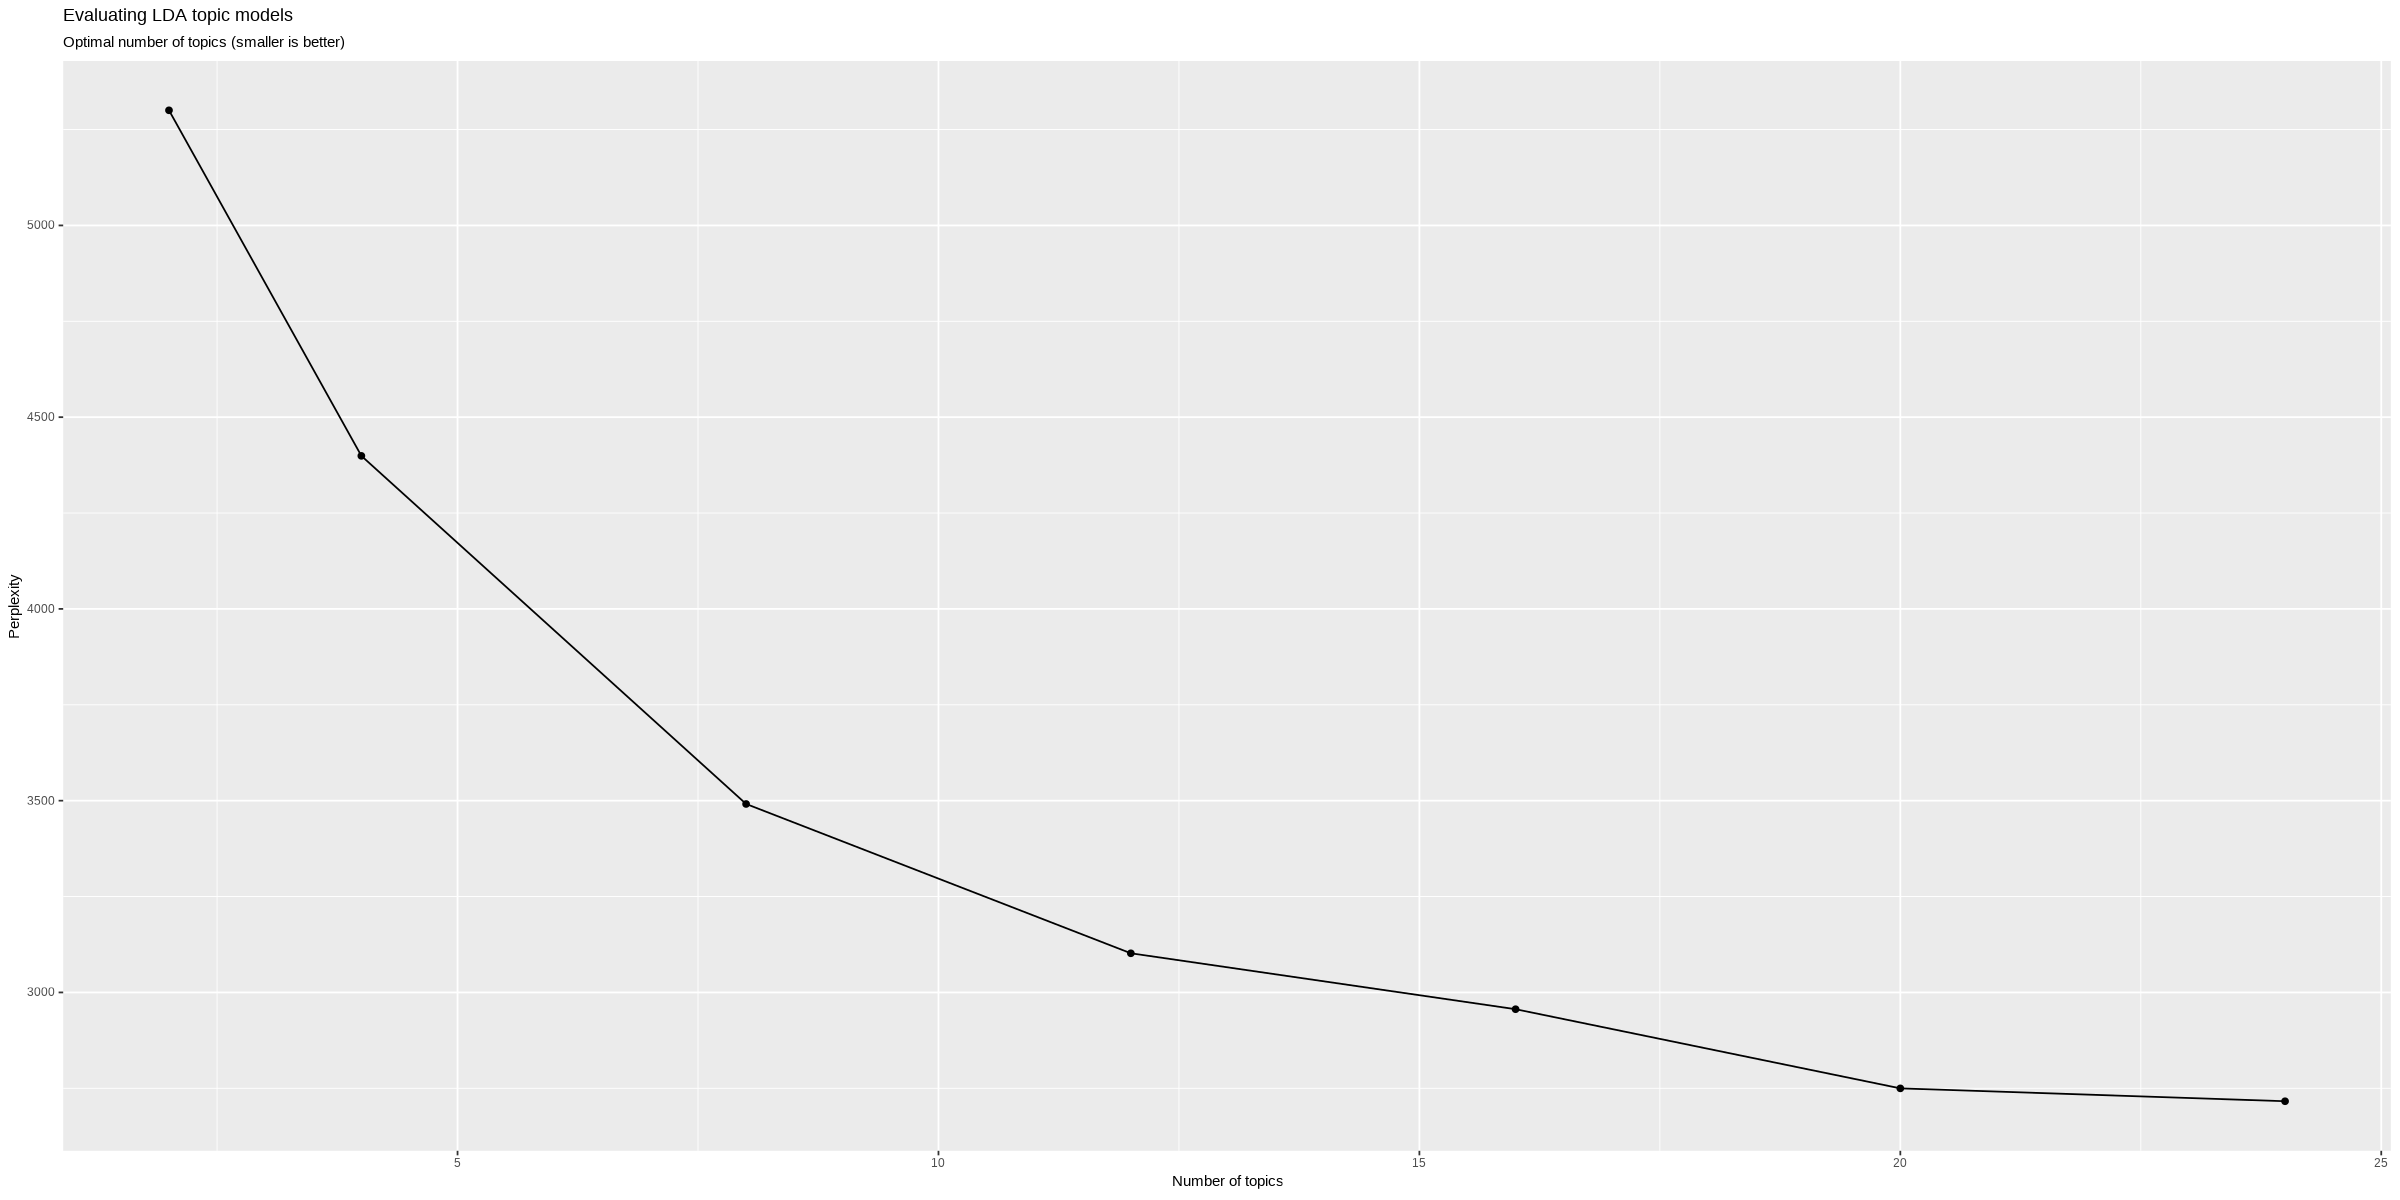

In [ ]:
perplex <- sapply(n_topics, function(k){ 
  lda.temp <- LDA(DTM, k =k, control = list(seed = 1109))
  perplexity(lda.temp)
})

data_frame(k=n_topics, perplex=perplex) %>%
  ggplot(aes(k, perplex)) +
  geom_point() +
  geom_line() +
  labs(title = "Evaluating LDA topic models",
       subtitle = "Optimal number of topics (smaller is better)",
       x = "Number of topics",
       y = "Perplexity")
##The model with the lowest perplexity is generally considered the “best”.
#25最豪~~~

In [ ]:
lda_25<-LDA(DTM, k =25, control = list(seed = 1109))

In [ ]:
lda_25

A LDA_VEM topic model with 25 topics.

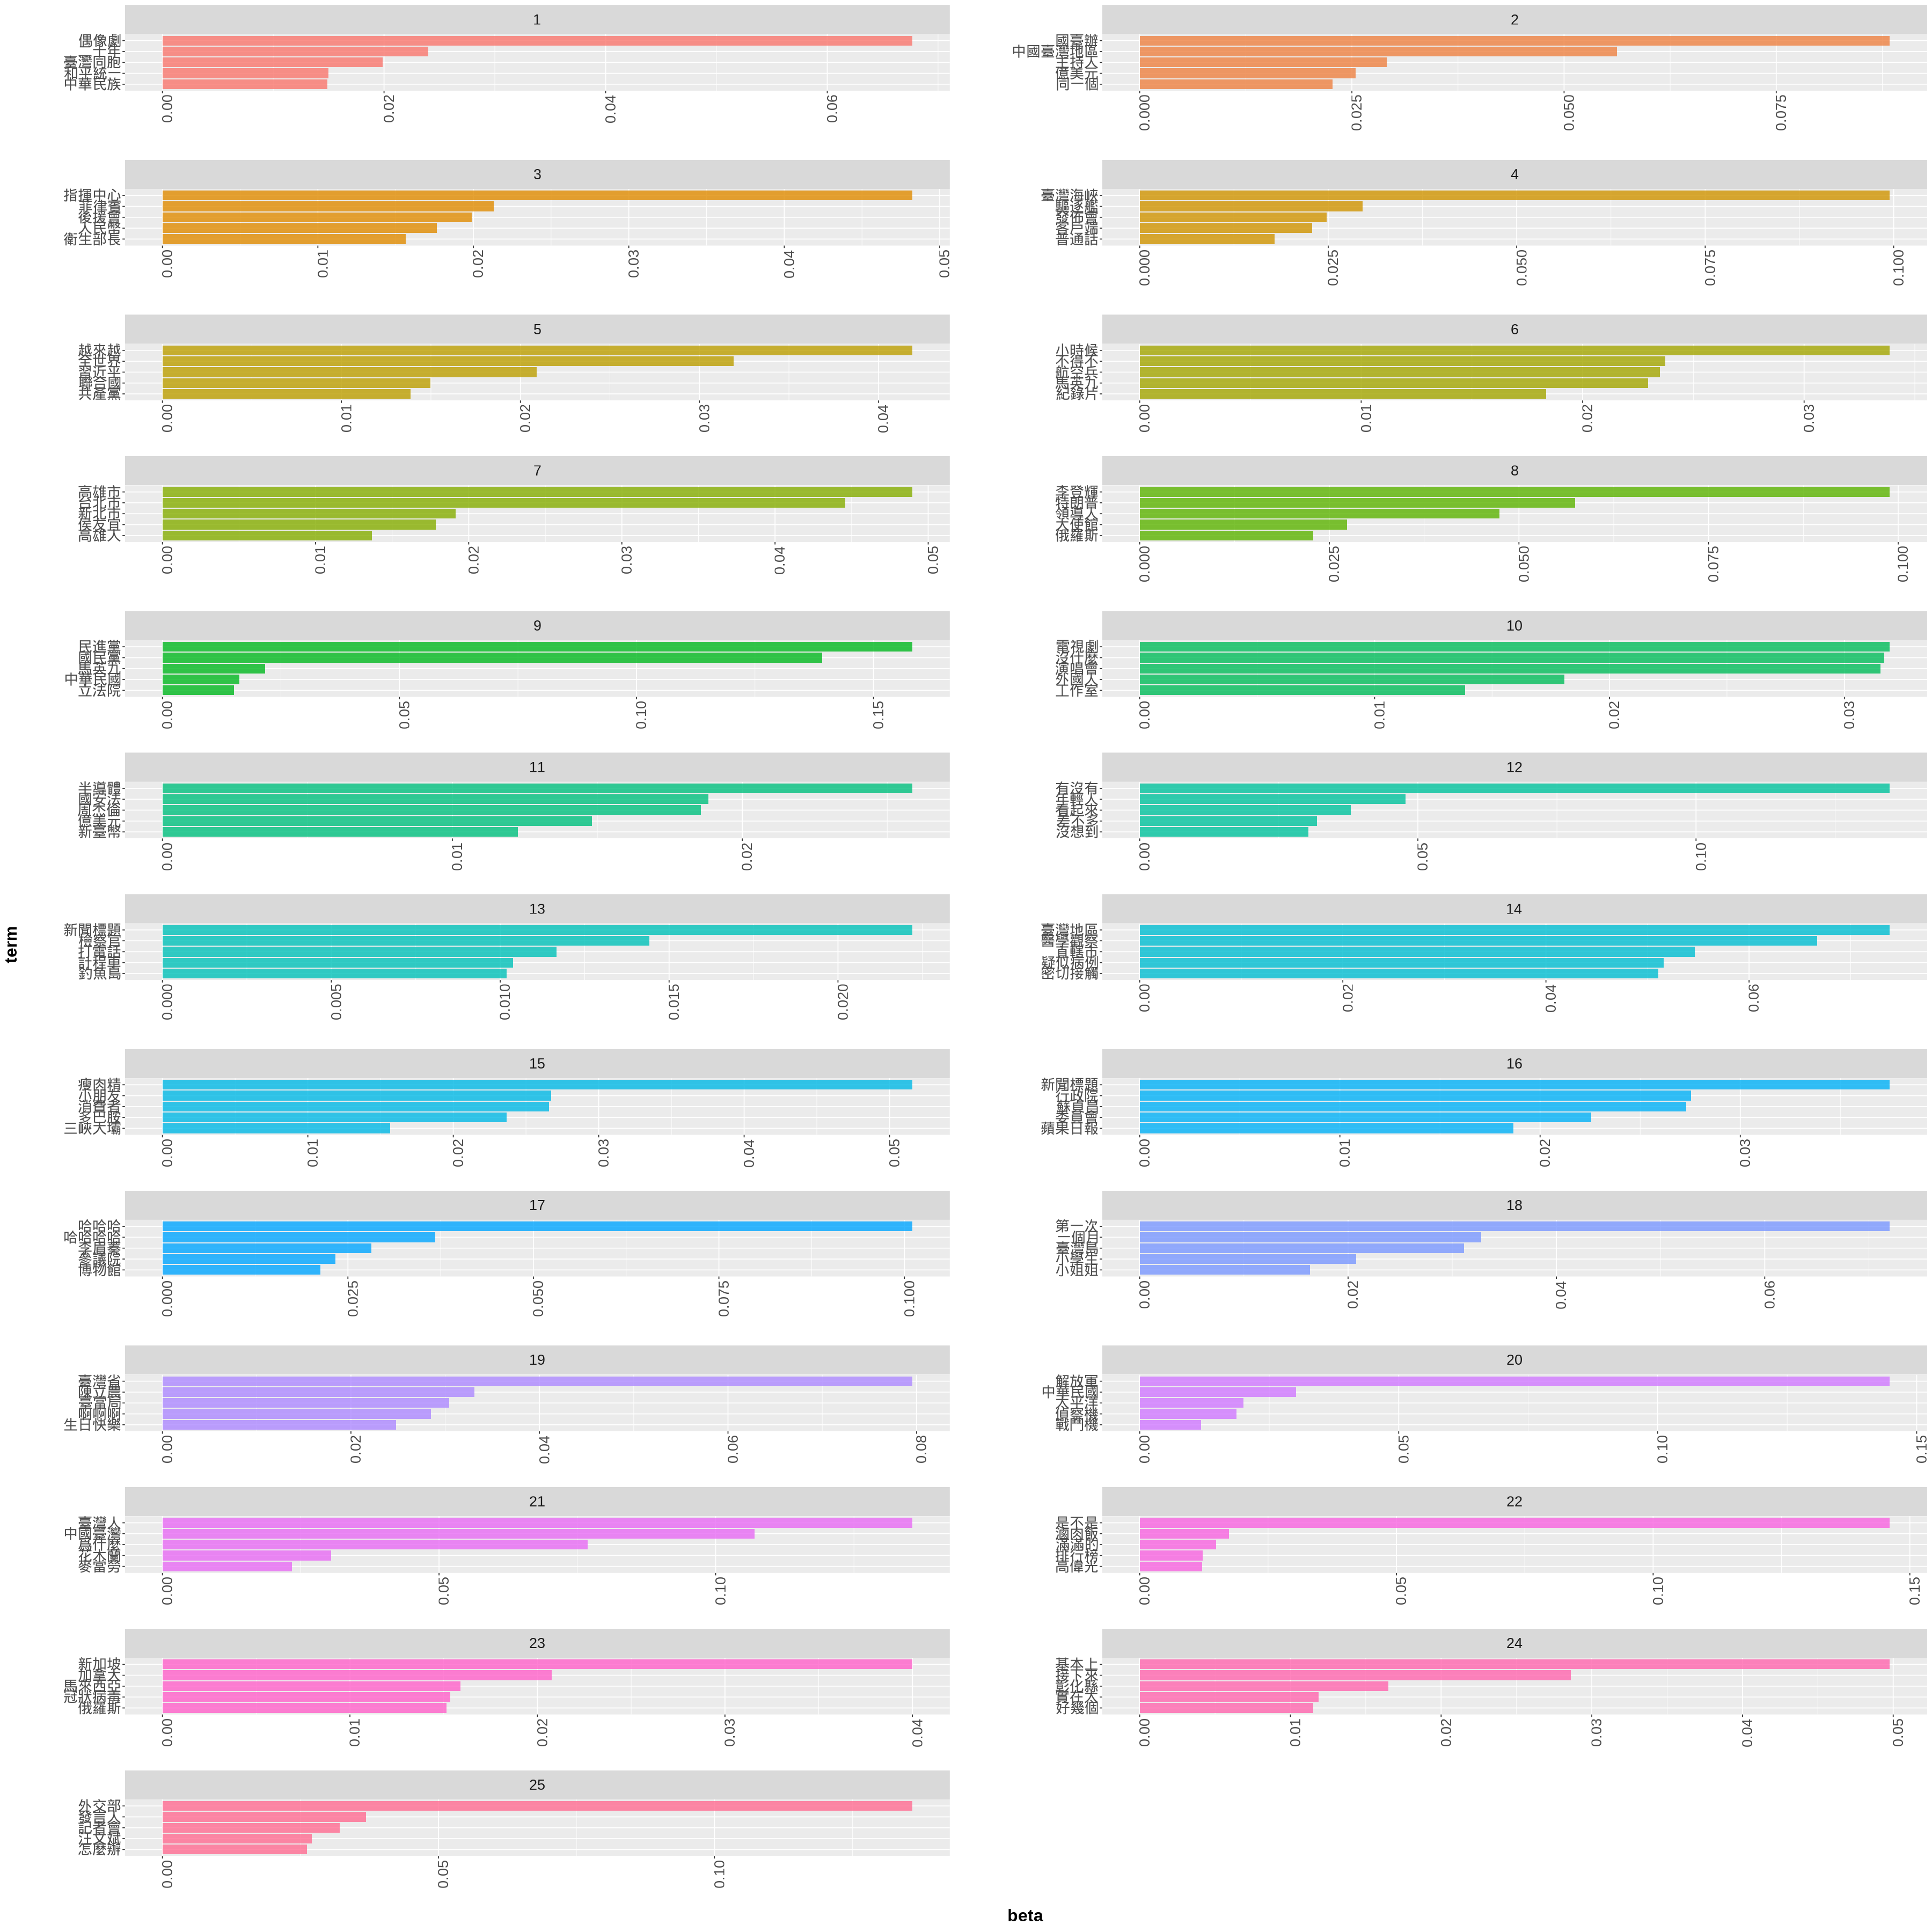

In [ ]:
#Possible topic distribution
options(repr.plot.width=30, repr.plot.height=30)
#jokes_lda_td <- tidy(jokes_lda_compare[[6]])
lda_25_td <- tidy(lda_25)
options(repr.plot.width=30, repr.plot.height=20)
top_terms <- lda_25_td %>%
  group_by(topic) %>%
  top_n(5, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

top_terms %>%
  mutate(
    topic = factor(topic),
    term = reorder_within(term, beta, topic)
  ) %>%
  ggplot(aes(term, beta, fill = topic)) +
  theme(text = element_text(size=25),axis.title=element_text(size=24,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1))+
  geom_bar(alpha = 0.8, stat = "identity", show.legend = FALSE) +
  scale_x_reordered() +
  facet_wrap(~topic, scales = "free", ncol = 2) +
  coord_flip()

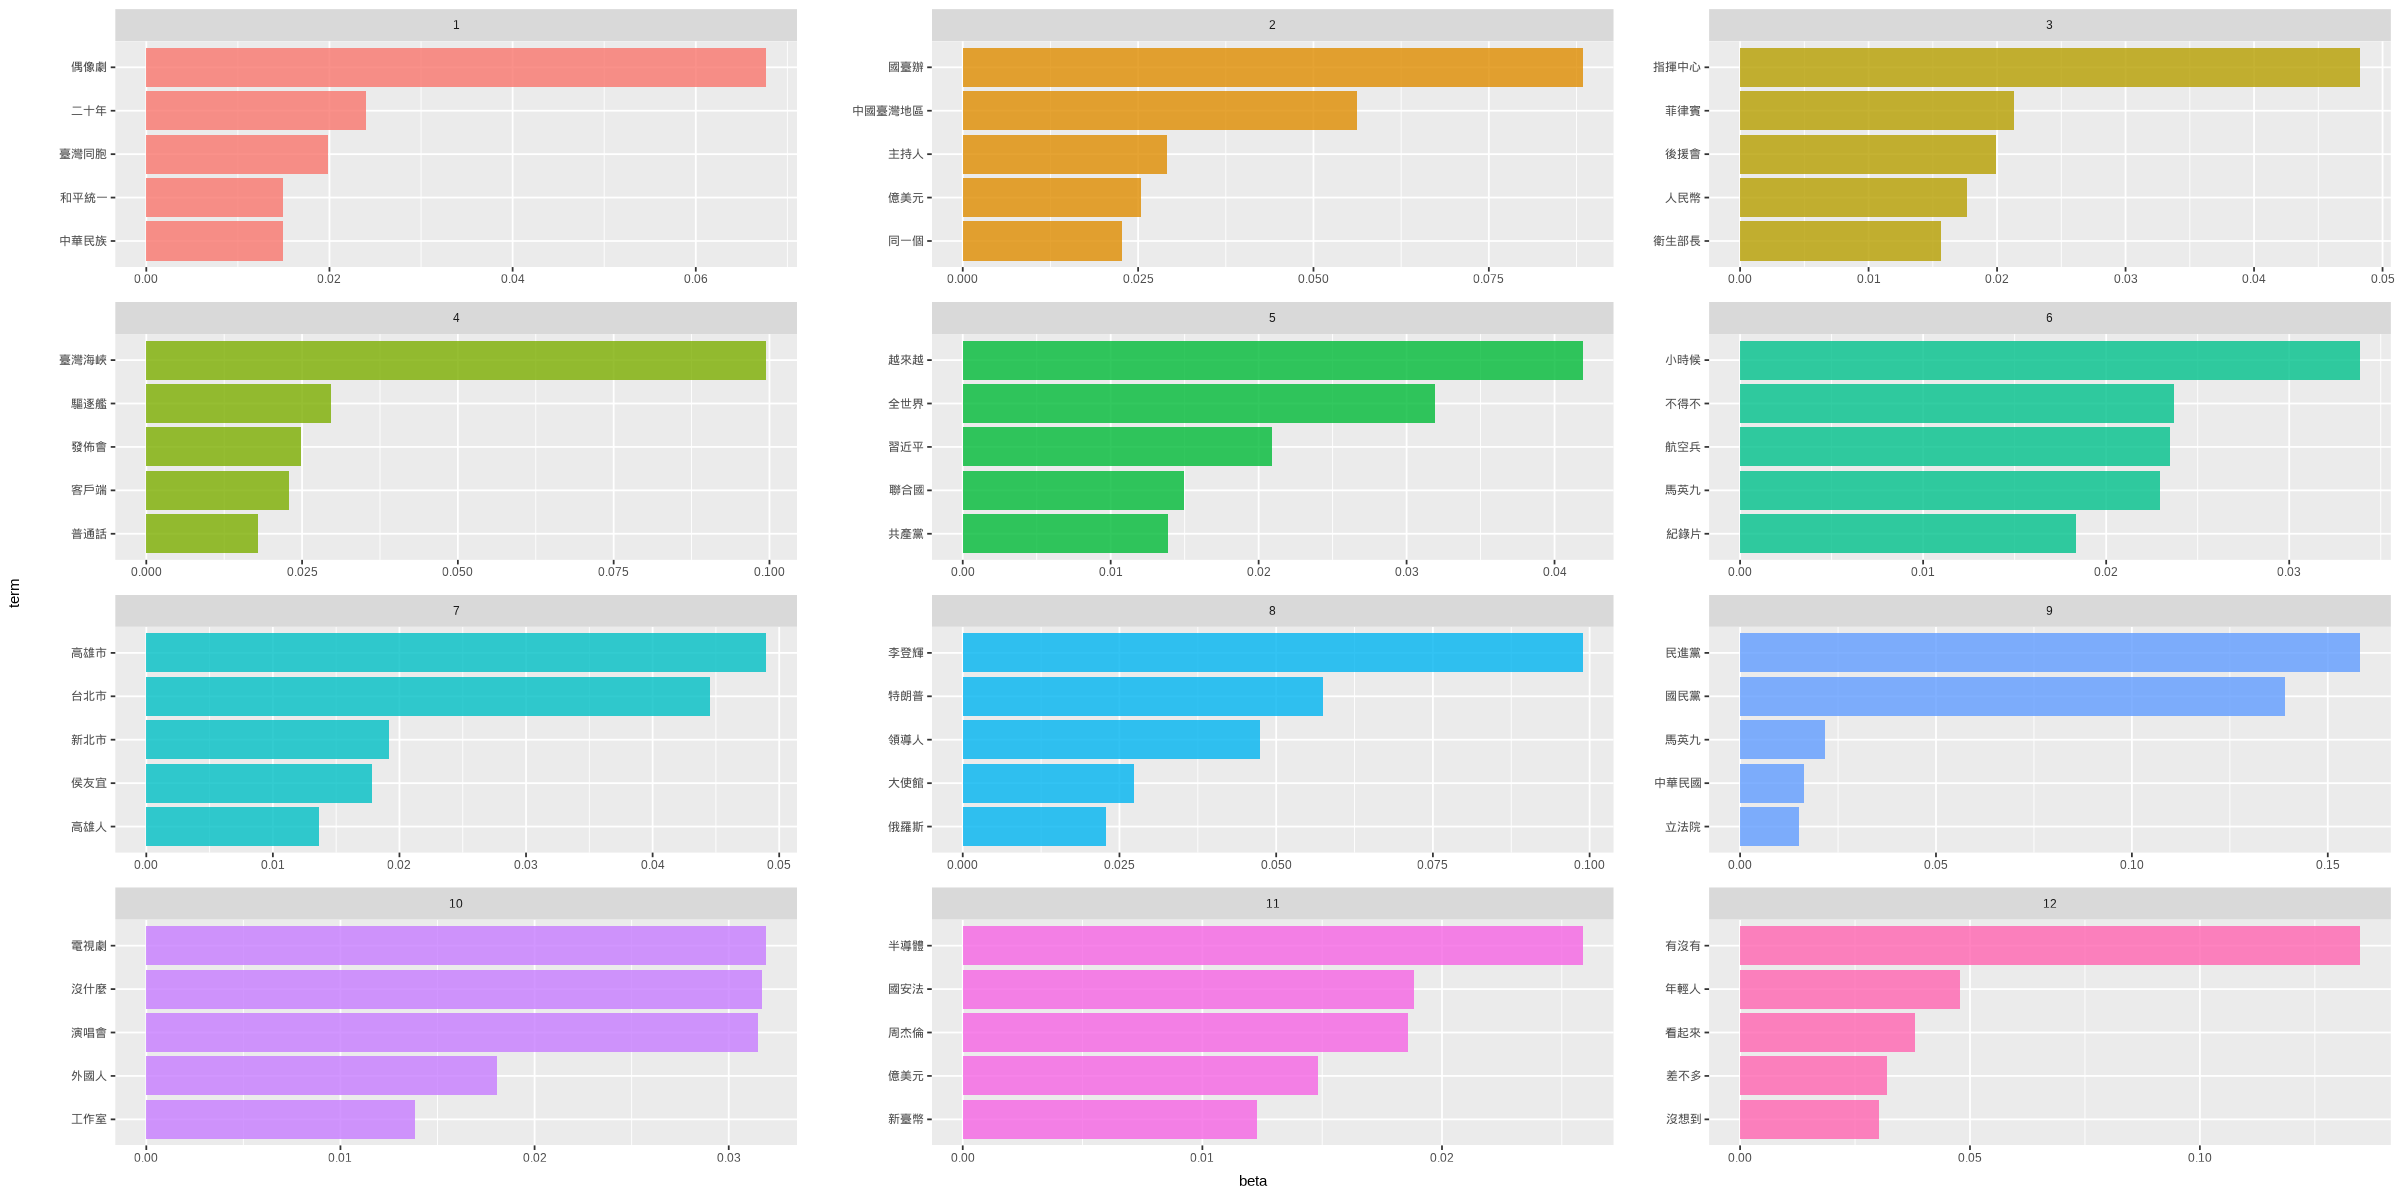

In [ ]:
# 25個topic 的model裡面只取 其中12個來看看
jokes_lda_td <- tidy(lda_25)

top_terms <- jokes_lda_td %>%
  group_by(topic) %>%
  top_n(5, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

top_terms %>%
  filter(topic <= 12) %>%
  mutate(
    topic = factor(topic),
    term = reorder_within(term, beta, topic)
  ) %>%
  ggplot(aes(term, beta, fill = topic)) +
  geom_bar(alpha = 0.8, stat = "identity", show.legend = FALSE) +
  scale_x_reordered() +
  facet_wrap(~topic, scales = "free", ncol = 3) +
  coord_flip()

# LDA function: method = gibbs

In [ ]:
# number of topics
K <- 20
# set random number generator seed
set.seed(9161)
# compute the LDA model, inference via 1000 iterations of Gibbs sampling
topicModel <- LDA(DTM, K, method="Gibbs", control=list(iter = 500, verbose = 25))

K = 20; V = 24809; M = 117917
Sampling 500 iterations!
Iteration 25 ...
Iteration 50 ...
Iteration 75 ...
Iteration 100 ...
Iteration 125 ...
Iteration 150 ...
Iteration 175 ...
Iteration 200 ...
Iteration 225 ...
Iteration 250 ...
Iteration 275 ...
Iteration 300 ...
Iteration 325 ...
Iteration 350 ...
Iteration 375 ...
Iteration 400 ...
Iteration 425 ...
Iteration 450 ...
Iteration 475 ...
Iteration 500 ...
Gibbs sampling completed!


In [22]:
# number of topics
K <- 25
# set random number generator seed
set.seed(9161)
# compute the LDA model, inference via 1000 iterations of Gibbs sampling
topicModel2 <- LDA(DTM, K, method="Gibbs", control=list(iter = 500, verbose = 25))

K = 25; V = 24809; M = 117917
Sampling 500 iterations!
Iteration 25 ...
Iteration 50 ...
Iteration 75 ...
Iteration 100 ...
Iteration 125 ...
Iteration 150 ...
Iteration 175 ...
Iteration 200 ...
Iteration 225 ...
Iteration 250 ...
Iteration 275 ...
Iteration 300 ...
Iteration 325 ...
Iteration 350 ...
Iteration 375 ...
Iteration 400 ...
Iteration 425 ...
Iteration 450 ...
Iteration 475 ...
Iteration 500 ...
Gibbs sampling completed!


In [23]:
# have a look a some of the results (posterior distributions)
tmResult2 <- posterior(topicModel2)
# format of the resulting object
attributes(tmResult2)

$names
[1] "terms"  "topics"

In [ ]:
nTerms(DTM)

[1] 24809

In [ ]:
# topics are probability distribtions over the entire vocabulary
beta <- tmResult2$terms   # get beta from results
dim(beta)  

[1]    25 24809

In [ ]:
nDocs(DTM)               # size of collection

[1] 117917

In [ ]:
#k =20 
# for every document we have a probaility distribution of its contained topics
theta <- tmResult$topics 
dim(theta)               # nDocs(DTM) distributions over K topics

[1] 117917     20

In [ ]:
#k =25
# for every document we have a probaility distribution of its contained topics
theta <- tmResult2$topics 
dim(theta)               # nDocs(DTM) distributions over K topics

[1] 117917     25

In [ ]:
rowSums(theta)[1:10]     # rows in theta sum to 1

weibo_1_T1  weibo_2_T1  weibo_3_T1  weibo_4_T1  weibo_5_T1  weibo_6_T1 
          1           1           1           1           1           1 
 weibo_7_T1  weibo_8_T1 weibo_10_T1 weibo_11_T1 
          1           1           1           1

In [ ]:
# theta

1      2      3      4      5     
weibo_1_T1   0.1964 0.1786 0.2143 0.1964 0.2143
weibo_2_T1   0.1852 0.1852 0.2037 0.2407 0.1852
weibo_3_T1   0.1923 0.2308 0.1923 0.1923 0.1923
weibo_4_T1   0.1724 0.2414 0.1897 0.1724 0.2241
weibo_5_T1   0.1786 0.1964 0.2143 0.1786 0.2321
weibo_6_T1   0.2075 0.2075 0.1887 0.1887 0.2075
weibo_7_T1   0.1964 0.2143 0.1786 0.1786 0.2321
weibo_8_T1   0.1887 0.1887 0.1887 0.1887 0.2453
weibo_10_T1  0.1719 0.3438 0.1562 0.1719 0.1562
weibo_11_T1  0.1754 0.2456 0.1754 0.1754 0.2281
weibo_12_T1  0.1961 0.2157 0.1961 0.1961 0.1961
weibo_13_T1  0.1961 0.1961 0.1961 0.1961 0.2157
weibo_14_T1  0.1818 0.2182 0.2364 0.1818 0.1818
weibo_15_T1  0.2222 0.2222 0.1852 0.1852 0.1852
weibo_16_T1  0.1961 0.2157 0.1961 0.1961 0.1961
weibo_18_T1  0.2182 0.1818 0.1818 0.1818 0.2364
weibo_19_T1  0.1923 0.2308 0.1923 0.1923 0.1923
weibo_21_T1  0.1923 0.1923 0.1923 0.1923 0.2308
weibo_22_T1  0.2308 0.1923 0.1923 0.1923 0.1923
weibo_23_T1  0.1754 0.2807 0.1754 0.1754 0.1930
weibo_25_T1  0.1754 0.1754 0.1754 0.1930 0.2807
weibo_27_T1  0.1754 0.2807 0.1754 0.1754 0.1930
weibo_28_T1  0.1961 0.1961 0.1961 0.1961 0.2157
weibo_30_T1  0.1961 0.1961 0.1961 0.1961 0.2157
weibo_31_T1  0.1961 0.2157 0.1961 0.1961 0.1961
weibo_32_T1  0.1961 0.2157 0.1961 0.1961 0.1961
weibo_35_T1  0.2105 0.2105 0.2281 0.1754 0.1754
weibo_36_T1  0.1961 0.2157 0.1961 0.1961 0.1961
weibo_37_T1  0.2000 0.2182 0.1818 0.1818 0.2182
weibo_38_T1  0.1961 0.1961 0.1961 0.2157 0.1961
⋮            ⋮      ⋮      ⋮      ⋮      ⋮     
ptt_31471_T9 0.1754 0.2281 0.1930 0.2105 0.1930
ptt_31472_T9 0.2264 0.2075 0.1887 0.1887 0.1887
ptt_31473_T9 0.3284 0.1642 0.1642 0.1791 0.1642
ptt_31474_T9 0.1818 0.2000 0.2364 0.2000 0.1818
ptt_31475_T9 0.1613 0.2581 0.1774 0.2419 0.1613
ptt_31476_T9 0.2692 0.1154 0.1442 0.1346 0.3365
ptt_31477_T9 0.2105 0.1754 0.1754 0.2105 0.2281
ptt_31478_T9 0.4430 0.1266 0.1266 0.1772 0.1266
ptt_31479_T9 0.2037 0.1852 0.2222 0.1852 0.2037
ptt_31480_T9 0.2812 0.1719 0.1875 0.2031 0.1562
ptt_31481_T9 0.1746 0.1746 0.2381 0.2222 0.1905
ptt_31482_T9 0.1897 0.1724 0.2069 0.1724 0.2586
ptt_31483_T9 0.1923 0.1923 0.1923 0.2115 0.2115
ptt_31484_T9 0.1961 0.1961 0.1961 0.1961 0.2157
ptt_31485_T9 0.1754 0.1754 0.2105 0.2456 0.1930
ptt_31486_T9 0.2037 0.1852 0.1852 0.2407 0.1852
ptt_31487_T9 0.1923 0.2115 0.1923 0.1923 0.2115
ptt_31488_T9 0.1875 0.1719 0.1562 0.2969 0.1875
ptt_31489_T9 0.2000 0.1818 0.1818 0.1818 0.2545
ptt_31490_T9 0.1923 0.1923 0.1923 0.1923 0.2308
ptt_31491_T9 0.1887 0.1887 0.1887 0.2264 0.2075
ptt_31492_T9 0.2667 0.1833 0.1667 0.1667 0.2167
ptt_31493_T9 0.2034 0.1695 0.2542 0.1864 0.1864
ptt_31494_T9 0.2297 0.2027 0.1486 0.2838 0.1351
ptt_31495_T9 0.2308 0.1923 0.1923 0.1923 0.1923
ptt_31496_T9 0.1341 0.1220 0.1707 0.3902 0.1829
ptt_31497_T9 0.1961 0.1961 0.2157 0.1961 0.1961
ptt_31498_T9 0.2031 0.1562 0.1719 0.2812 0.1875
ptt_31499_T9 0.1964 0.1964 0.1964 0.2143 0.1964
ptt_31500_T9 0.1961 0.1961 0.2157 0.1961 0.1961

In [ ]:
#k =20
#Let’s take a look at the 10 most likely terms within the term probabilities beta of the inferred topics (only the first 8 are shown below).
terms(topicModel, 10)

Topic 1  Topic 2 Topic 3          Topic 4      Topic 5  Topic 6  Topic 7 
 [1,] 民進黨   年輕人  臺灣地區         國臺辦       中國臺灣 第一次   特朗普  
 [2,] 國民黨   一個月  醫學觀察         中國臺灣地區 演唱會   日環食   俄羅斯  
 [3,] 中華民國 沒什麼  臺灣省           臺當局       花木蘭   航空兵   臺灣島  
 [4,] 馬英九   小朋友  直轄市           愛奇藝       鄧紫棋   一點點   大使館  
 [5,] 候選人   麥當勞  疑似病例         委員會       主持人   看起來   辦公室  
 [6,] 支持者   差不多  密切接觸         發佈會       張韶涵   滿滿的   太平洋  
 [7,] 李眉蓁   第一個  自治區           教育部       周杰倫   營業時間 中國政府
 [8,] 侯友宜   小學生  無症狀           臺灣同胞     金曲獎   巧克力   客戶端  
 [9,] 陸委會   一輩子  新疆生產建設兵團 海峽兩岸     女歌手   冰淇淋   人民日報
[10,] 執政黨   有時候  感染者           郭碧婷       中國香港 一下子   胡錫進  
      Topic 8  Topic 9  Topic 10 Topic 11 Topic 12 Topic 13 Topic 14 Topic 15
 [1,] 解放軍   新加坡   台北市   億美元   行政院   臺灣海峽 中央社   李登輝  
 [2,] 外交部   沒想到   新聞標題 半導體   蘇貞昌   爲什麼   指揮中心 國安法  
 [3,] 發言人   馬來西亞 消費者   有限公司 委員會   是因爲   菲律賓   習近平  
 [4,] 一部分   滷肉飯   董事長   中國臺灣 立法院   驅逐艦   加拿大   領導人  
 [5,] 國防部   東南亞   經濟部   人民幣   總統府   不得不   聯合國   一國兩制
 [6,] 國家主權 紀錄片   滿意度   伊能靜   衛福部   黃鴻升   冠狀病毒 兩岸關係
 [7,] 領土完整 工作室   交通部   供應鏈   記者會   金鐘獎   記者會   美國政府
 [8,] 汪文斌   大學生   臺北市   產業鏈   公務員   馬斯廷   新聞標題 蔣介石  
 [9,] 不可分割 炎亞綸   內政部   台積電   基金會   許光漢   以色列   中華民族
[10,] 中美關係 排行榜   新聞網   競爭力   受害者   高以翔   西班牙   和平統一
      Topic 16 Topic 17 Topic 18 Topic 19 Topic 20
 [1,] 新聞標題 同一個   臺灣人   有沒有   越來越  
 [2,] 高雄市   檢察官   哈哈哈   是不是   瘦肉精  
 [3,] 新北市   沒想到   偶像劇   看起來   全世界  
 [4,] 蘋果日報 打電話   電視劇   怎麼辦   基本上  
 [5,] 衛生局   火山石   哈哈哈哈 外國人   實際上  
 [6,] 台南市   被害人   陳立農   博物館   多巴胺  
 [7,] 法新社   其他人   啊啊啊   林佳龍   共產黨  
 [8,] 彰化縣   當事人   二十年   三峽大壩 事實上  
 [9,] 高雄人   女朋友   後援會   計程車   農委會  
[10,] 新聞網   繁體中文 小姐姐   網路上   大部分

In [ ]:
#k =25
#Let’s take a look at the 10 most likely terms within the term probabilities beta of the inferred topics (only the first 8 are shown below).
terms(topicModel2, 10)

Topic 1 Topic 2 Topic 3  Topic 4  Topic 5  Topic 6  Topic 7 Topic 8
 [1,] 民進黨  爲什麼  小朋友   有沒有   臺灣省   演唱會   全世界  沒什麼 
 [2,] 國民黨  偶像劇  小學生   是不是   博物館   鄧紫棋   實際上  一個月 
 [3,] 馬英九  電視劇  衛生局   看起來   臺灣同胞 生日快樂 接下來  差不多 
 [4,] 立法院  臺當局  原住民   怎麼辦   海峽兩岸 周杰倫   航空兵  基本上 
 [5,] 候選人  麥當勞  小時候   受害者   和平統一 金曲獎   大多數  沒關係 
 [6,] 支持者  二十年  古代史   怎麼樣   中華民族 女歌手   幾十年  一輩子 
 [7,] 李眉蓁  愛奇藝  有意思   郭碧婷   福建省   設計師   可能性  有時候 
 [8,] 執政黨  小時候  彰化縣   嫌疑人   近代史   五月天   基本上  看不懂 
 [9,] 在野黨  臺灣版  央視網   臺灣籍   委員會   閩南語   影響力  大部分 
[10,] 吳益政  許光漢  野生動物 繁體中文 阿里山   蔡依林   老百姓  其他人 
      Topic 9  Topic 10 ⋯ Topic 16 Topic 17 Topic 18 Topic 19 Topic 20 Topic 21
 [1,] 外交部   臺灣人   ⋯ 解放軍   中央社   半導體   李登輝   高雄市   新聞標題
 [2,] 發言人   哈哈哈   ⋯ 臺灣海峽 新加坡   有限公司 中華民國 蘇貞昌   蘋果日報
 [3,] 特朗普   哈哈哈哈 ⋯ 一部分   指揮中心 人民幣   國安法   新聞標題 法新社  
 [4,] 記者會   主持人   ⋯ 國防部   菲律賓   億美元   習近平   新北市   檢察官  
 [5,] 趙立堅   參議院   ⋯ 發言人   加拿大   供應鏈   陳立農   侯友宜   新聞網  
 [6,] 大使館   後援會   ⋯ 國家主權 俄羅斯   新臺幣   兩岸關係 滿意度   計程車  
 [7,] 汪文斌   工作室   ⋯ 不可分割 冠狀病毒 產業鏈   共產黨   高雄人   打電話  
 [8,] 衛生部長 普通話   ⋯ 驅逐艦   馬來西亞 台積電   領導人   行政院長 被害人  
 [9,] 中美關係 炎亞綸   ⋯ 領土完整 記者會   上半年   聯合國   桃園市   當事人  
[10,] 人民日報 維斯特   ⋯ 進一步   以色列   競爭力   一國兩制 王浩宇   廢棄物  
      Topic 22         Topic 23 Topic 24 Topic 25
 [1,] 臺灣地區         年輕人   花木蘭   瘦肉精  
 [2,] 醫學觀察         外國人   日環食   消費者  
 [3,] 直轄市           工程師   滿滿的   衛福部  
 [4,] 疑似病例         第一個   一點點   多巴胺  
 [5,] 密切接觸         教育部   三峽大壩 農委會  
 [6,] 自治區           研究所   劉亦菲   黃鴻升  
 [7,] 無症狀           大學生   看起來   金鐘獎  
 [8,] 新疆生產建設兵團 林佳龍   營業時間 基金會  
 [9,] 感染者           圖書館   巧克力   高以翔  
[10,] 香港特別行政區   第二個   停車場   國家隊

In [ ]:
#20 topic
# For the next steps, we want to give the topics more descriptive names than just numbers. 
# Therefore, we simply concatenate the five most likely terms of each topic to a string that represents a pseudo-name for each topic.
top5termsPerTopic <- terms(topicModel, 5)
topicNames <- apply(top5termsPerTopic, 2, paste, collapse=" ")


In [ ]:
#25 topic
# For the next steps, we want to give the topics more descriptive names than just numbers. 
# Therefore, we simply concatenate the five most likely terms of each topic to a string that represents a pseudo-name for each topic.
top5termsPerTopic <- terms(topicModel2, 5)
topicNames <- apply(top5termsPerTopic, 2, paste, collapse=" ")

In [ ]:
topicNames

Topic 1 
        "民進黨 國民黨 馬英九 立法院 候選人" 
                                     Topic 2 
        "爲什麼 偶像劇 電視劇 臺當局 麥當勞" 
                                     Topic 3 
        "小朋友 小學生 衛生局 原住民 小時候" 
                                     Topic 4 
        "有沒有 是不是 看起來 怎麼辦 受害者" 
                                     Topic 5 
  "臺灣省 博物館 臺灣同胞 海峽兩岸 和平統一" 
                                     Topic 6 
      "演唱會 鄧紫棋 生日快樂 周杰倫 金曲獎" 
                                     Topic 7 
        "全世界 實際上 接下來 航空兵 大多數" 
                                     Topic 8 
        "沒什麼 一個月 差不多 基本上 沒關係" 
                                     Topic 9 
        "外交部 發言人 特朗普 記者會 趙立堅" 
                                    Topic 10 
      "臺灣人 哈哈哈 哈哈哈哈 主持人 參議院" 
                                    Topic 11 
        "第一次 沒想到 台南市 滷肉飯 蔣介石" 
                                    Topic 12 
  "國臺辦 中國臺灣地區 發佈會 億美元 陸委會" 
                                    Topic 13 
      "中國臺灣 越來越 張韶涵 是因爲 火山石" 
                                    Topic 14 
        "臺灣島 啊啊啊 太平洋 紀錄片 伊能靜" 
                                    Topic 15 
      "台北市 行政院 委員會 新聞標題 經濟部" 
                                    Topic 16 
      "解放軍 臺灣海峽 一部分 國防部 發言人" 
                                    Topic 17 
      "中央社 新加坡 指揮中心 菲律賓 加拿大" 
                                    Topic 18 
      "半導體 有限公司 人民幣 億美元 供應鏈" 
                                    Topic 19 
      "李登輝 中華民國 國安法 習近平 陳立農" 
                                    Topic 20 
      "高雄市 蘇貞昌 新聞標題 新北市 侯友宜" 
                                    Topic 21 
    "新聞標題 蘋果日報 法新社 檢察官 新聞網" 
                                    Topic 22 
"臺灣地區 醫學觀察 直轄市 疑似病例 密切接觸" 
                                    Topic 23 
        "年輕人 外國人 工程師 第一個 教育部" 
                                    Topic 24 
      "花木蘭 日環食 滿滿的 一點點 三峽大壩" 
                                    Topic 25 
        "瘦肉精 消費者 衛福部 多巴胺 農委會"

# Visualization: 主題時間流變

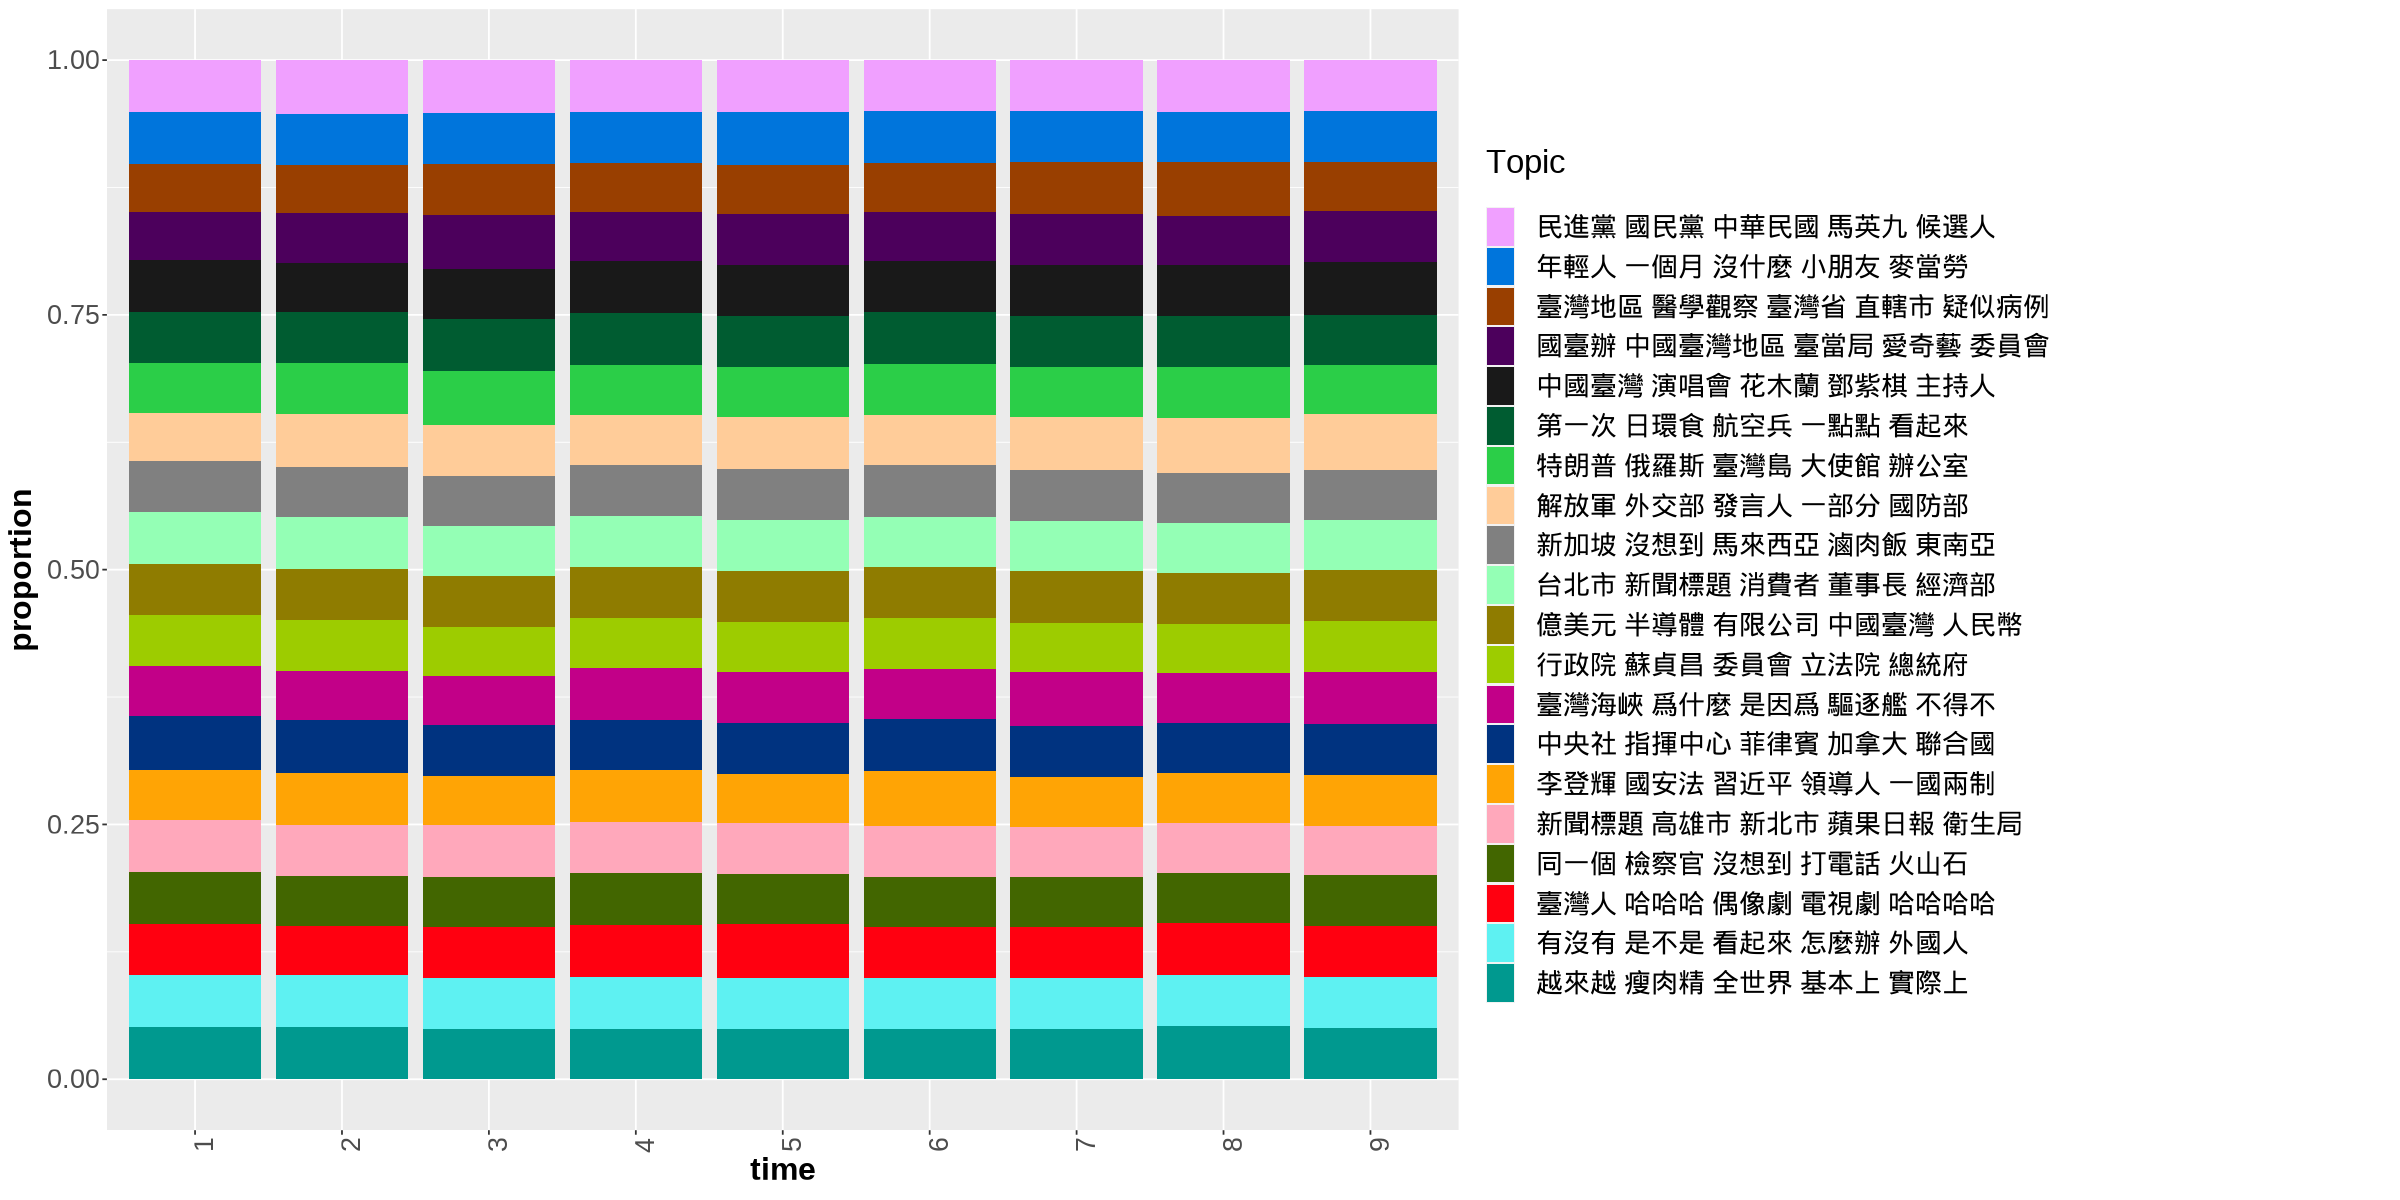

In [ ]:
#20 topic
#get time label
doc_dtm$time <- substr(doc_dtm$doc_id,nchar(doc_dtm$doc_id),nchar(doc_dtm$doc_id))  
# get mean topic proportions per decade

topic_proportion_per_time <- aggregate(theta, by = list(time = doc_dtm$time), mean)
# set topic names to aggregated columns
colnames(topic_proportion_per_time)[2:(K+1)] <- topicNames
# reshape data frame
vizDataFrame <- melt(topic_proportion_per_time, id.vars = "time")
# plot topic proportions per decade as bar plot
# Make plots wider 
options(repr.plot.width=20, repr.plot.height=10)
showtext_auto()
ggplot(vizDataFrame, aes(x=time, y=value, fill=variable)) + 
  geom_bar(stat = "identity") + ylab("proportion") + 
  scale_fill_manual(values = paste0(alphabet(20), "FF"), name = "Topic") + 
  theme(text = element_text(size=25),axis.title=element_text(size=24,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1))


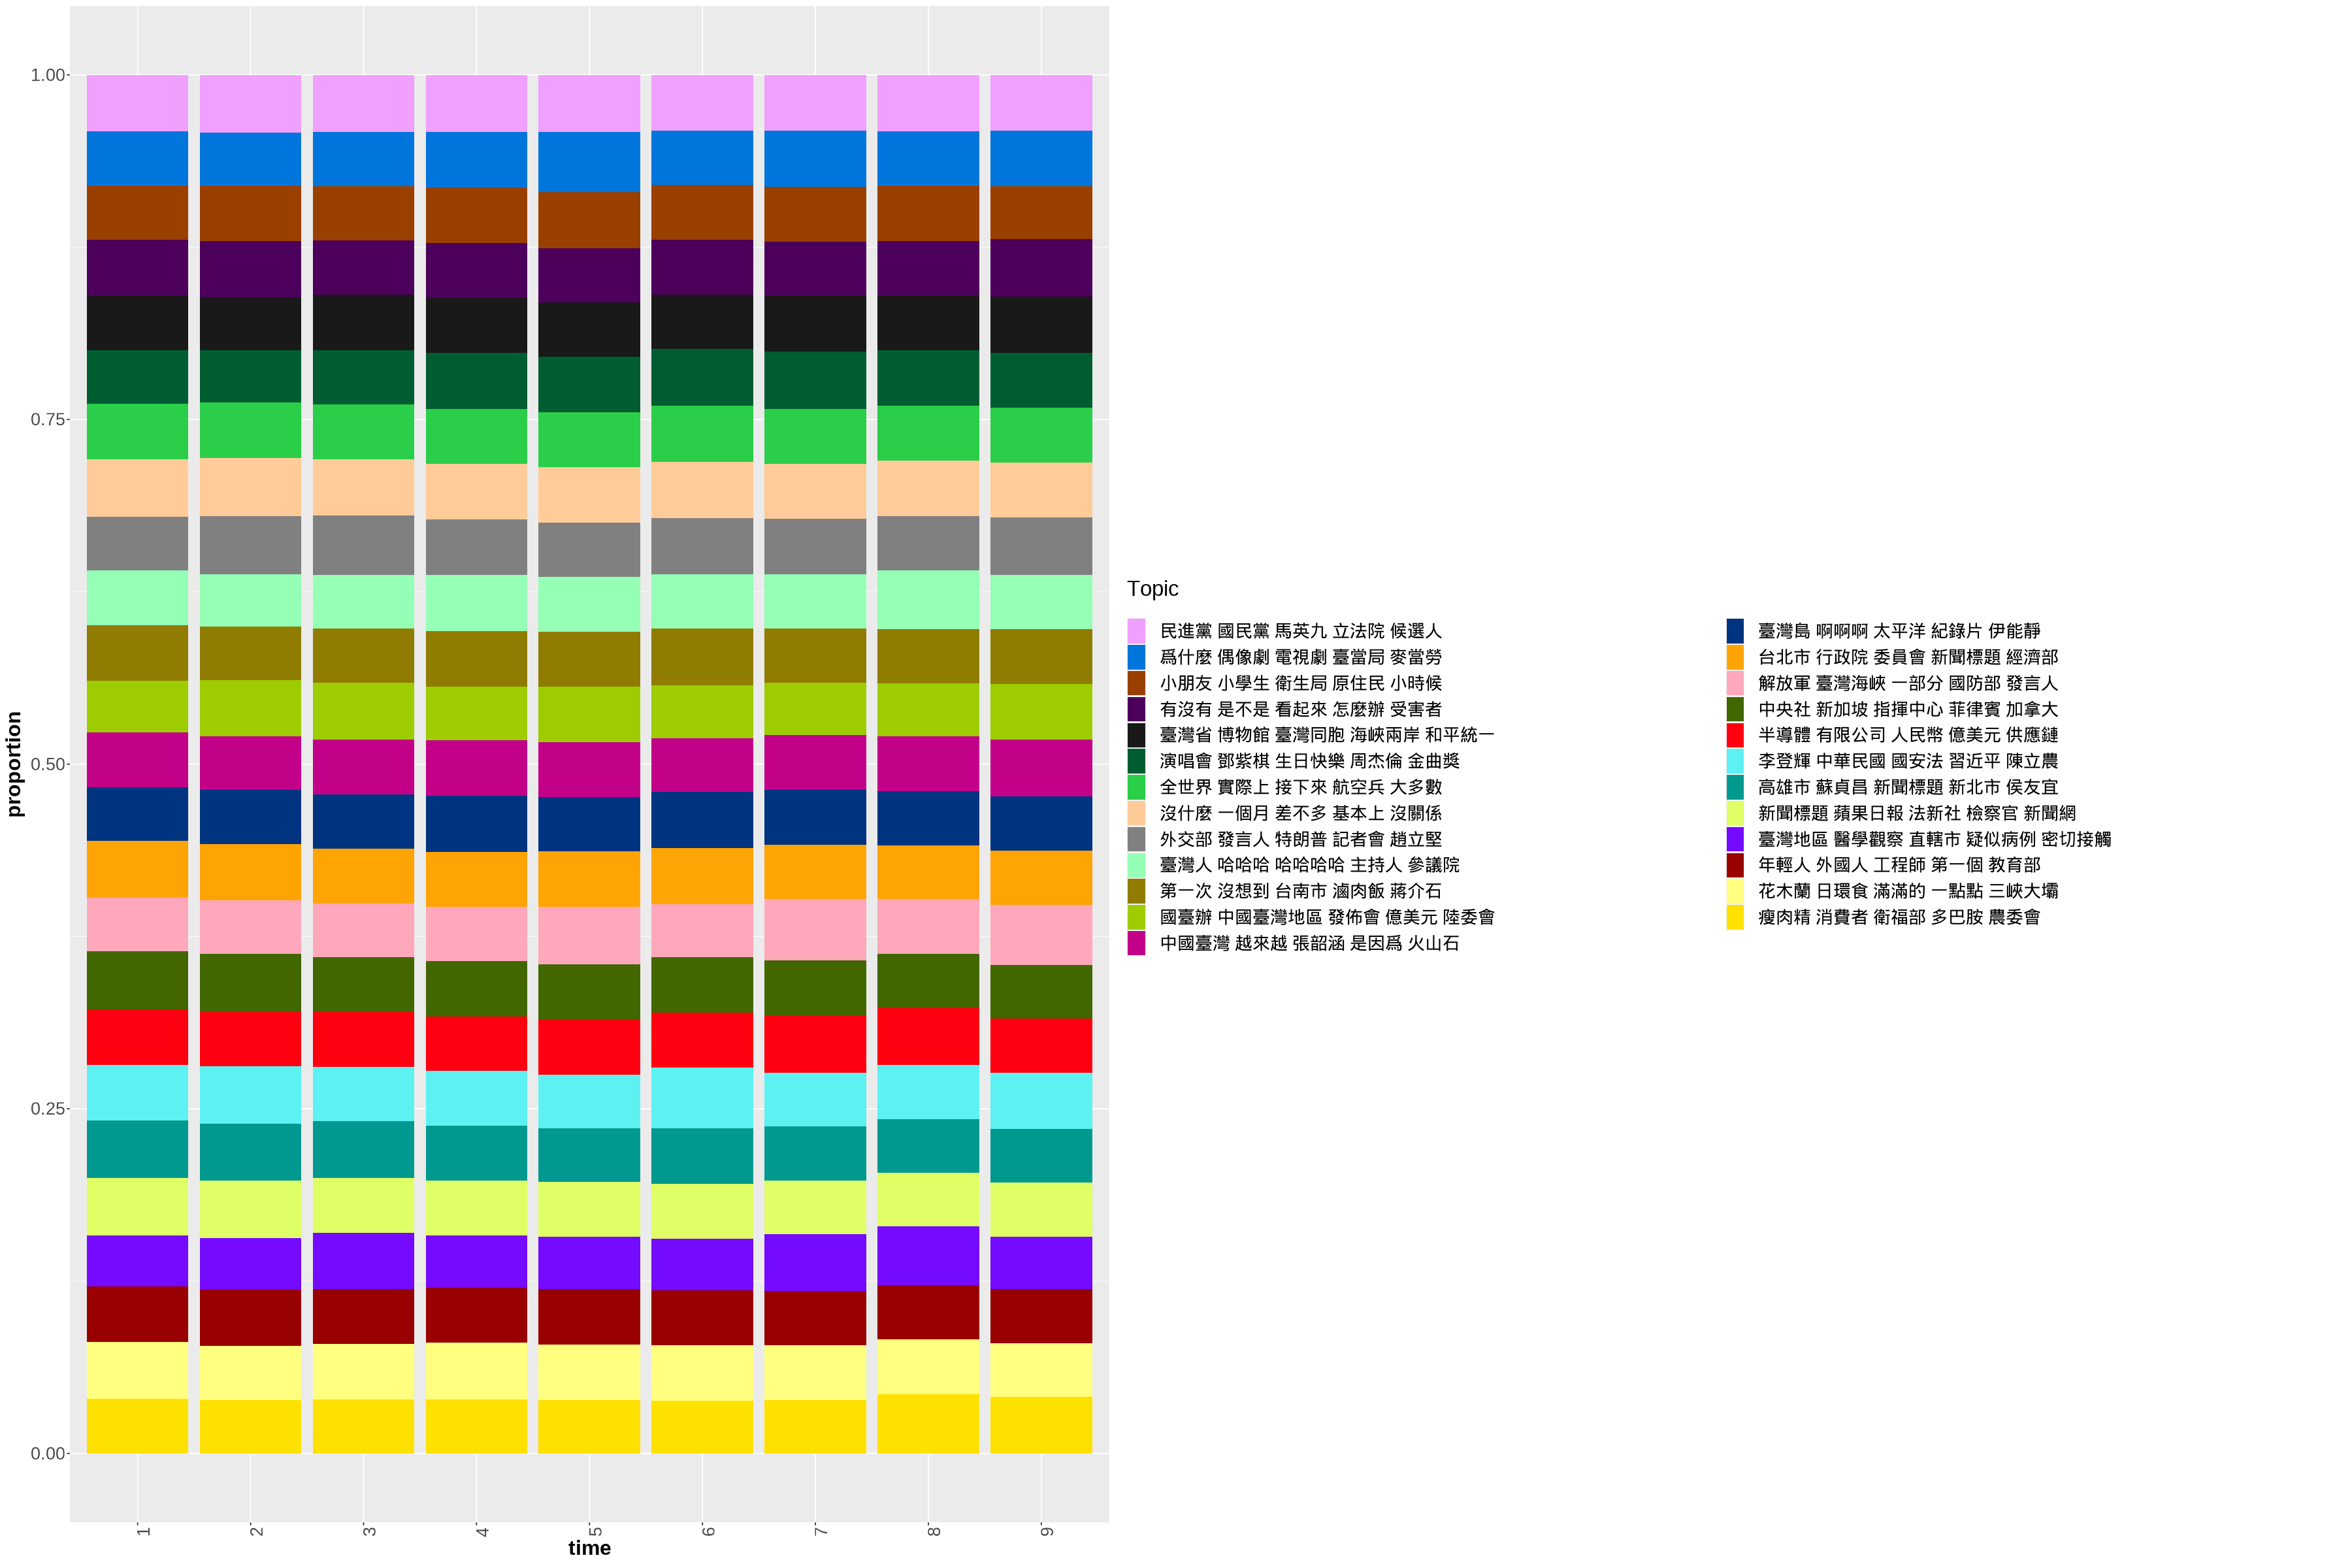

In [ ]:
#25 topic
#get time label
doc_dtm$time <- substr(doc_dtm$doc_id,nchar(doc_dtm$doc_id),nchar(doc_dtm$doc_id)) #the last number of the id
# get mean topic proportions per decade

topic_proportion_per_time <- aggregate(theta, by = list(time = doc_dtm$time), mean)
# set topic names to aggregated columns
colnames(topic_proportion_per_time)[2:(K+1)] <- topicNames  
# reshape data frame
vizDataFrame <- melt(topic_proportion_per_time, id.vars = "time")
# plot topic proportions per decade as bar plot
# Make plots wider 
options(repr.plot.width=30, repr.plot.height=20)
showtext_auto()
ggplot(vizDataFrame, aes(x=time, y=value, fill=variable)) + 
  geom_bar(stat = "identity") + ylab("proportion") + 
  scale_fill_manual(values = paste0(alphabet(K), "FF"), name = "Topic") +   
  theme(text = element_text(size=25),axis.title=element_text(size=24,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1))


  


# Key-word search

## Topic key words for search

In [26]:
top5termsPerTopic

Topic 1 Topic 2 Topic 3 Topic 4 Topic 5  Topic 6  Topic 7 Topic 8 Topic 9
[1,] 民進黨  爲什麼  小朋友  有沒有  臺灣省   演唱會   全世界  沒什麼  外交部 
[2,] 國民黨  偶像劇  小學生  是不是  博物館   鄧紫棋   實際上  一個月  發言人 
[3,] 馬英九  電視劇  衛生局  看起來  臺灣同胞 生日快樂 接下來  差不多  特朗普 
[4,] 立法院  臺當局  原住民  怎麼辦  海峽兩岸 周杰倫   航空兵  基本上  記者會 
[5,] 候選人  麥當勞  小時候  受害者  和平統一 金曲獎   大多數  沒關係  趙立堅 
     Topic 10 ⋯ Topic 16 Topic 17 Topic 18 Topic 19 Topic 20 Topic 21 Topic 22
[1,] 臺灣人   ⋯ 解放軍   中央社   半導體   李登輝   高雄市   新聞標題 臺灣地區
[2,] 哈哈哈   ⋯ 臺灣海峽 新加坡   有限公司 中華民國 蘇貞昌   蘋果日報 醫學觀察
[3,] 哈哈哈哈 ⋯ 一部分   指揮中心 人民幣   國安法   新聞標題 法新社   直轄市  
[4,] 主持人   ⋯ 國防部   菲律賓   億美元   習近平   新北市   檢察官   疑似病例
[5,] 參議院   ⋯ 發言人   加拿大   供應鏈   陳立農   侯友宜   新聞網   密切接觸
     Topic 23 Topic 24 Topic 25
[1,] 年輕人   花木蘭   瘦肉精  
[2,] 外國人   日環食   消費者  
[3,] 工程師   滿滿的   衛福部  
[4,] 第一個   一點點   多巴胺  
[5,] 教育部   三峽大壩 農委會

In [25]:
topicNames

Topic 1 
        "民進黨 國民黨 馬英九 立法院 候選人" 
                                     Topic 2 
        "爲什麼 偶像劇 電視劇 臺當局 麥當勞" 
                                     Topic 3 
        "小朋友 小學生 衛生局 原住民 小時候" 
                                     Topic 4 
        "有沒有 是不是 看起來 怎麼辦 受害者" 
                                     Topic 5 
  "臺灣省 博物館 臺灣同胞 海峽兩岸 和平統一" 
                                     Topic 6 
      "演唱會 鄧紫棋 生日快樂 周杰倫 金曲獎" 
                                     Topic 7 
        "全世界 實際上 接下來 航空兵 大多數" 
                                     Topic 8 
        "沒什麼 一個月 差不多 基本上 沒關係" 
                                     Topic 9 
        "外交部 發言人 特朗普 記者會 趙立堅" 
                                    Topic 10 
      "臺灣人 哈哈哈 哈哈哈哈 主持人 參議院" 
                                    Topic 11 
        "第一次 沒想到 台南市 滷肉飯 蔣介石" 
                                    Topic 12 
  "國臺辦 中國臺灣地區 發佈會 億美元 陸委會" 
                                    Topic 13 
      "中國臺灣 越來越 張韶涵 是因爲 火山石" 
                                    Topic 14 
        "臺灣島 啊啊啊 太平洋 紀錄片 伊能靜" 
                                    Topic 15 
      "台北市 行政院 委員會 新聞標題 經濟部" 
                                    Topic 16 
      "解放軍 臺灣海峽 一部分 國防部 發言人" 
                                    Topic 17 
      "中央社 新加坡 指揮中心 菲律賓 加拿大" 
                                    Topic 18 
      "半導體 有限公司 人民幣 億美元 供應鏈" 
                                    Topic 19 
      "李登輝 中華民國 國安法 習近平 陳立農" 
                                    Topic 20 
      "高雄市 蘇貞昌 新聞標題 新北市 侯友宜" 
                                    Topic 21 
    "新聞標題 蘋果日報 法新社 檢察官 新聞網" 
                                    Topic 22 
"臺灣地區 醫學觀察 直轄市 疑似病例 密切接觸" 
                                    Topic 23 
        "年輕人 外國人 工程師 第一個 教育部" 
                                    Topic 24 
      "花木蘭 日環食 滿滿的 一點點 三峽大壩" 
                                    Topic 25 
        "瘦肉精 消費者 衛福部 多巴胺 農委會"

In [32]:
#key words for selection
unlist(str_split(paste(top5termsPerTopic, collapse=', ' ),","))

[1] "民進黨"        " 國民黨"       " 馬英九"       " 立法院"      
  [5] " 候選人"       " 爲什麼"       " 偶像劇"       " 電視劇"      
  [9] " 臺當局"       " 麥當勞"       " 小朋友"       " 小學生"      
 [13] " 衛生局"       " 原住民"       " 小時候"       " 有沒有"      
 [17] " 是不是"       " 看起來"       " 怎麼辦"       " 受害者"      
 [21] " 臺灣省"       " 博物館"       " 臺灣同胞"     " 海峽兩岸"    
 [25] " 和平統一"     " 演唱會"       " 鄧紫棋"       " 生日快樂"    
 [29] " 周杰倫"       " 金曲獎"       " 全世界"       " 實際上"      
 [33] " 接下來"       " 航空兵"       " 大多數"       " 沒什麼"      
 [37] " 一個月"       " 差不多"       " 基本上"       " 沒關係"      
 [41] " 外交部"       " 發言人"       " 特朗普"       " 記者會"      
 [45] " 趙立堅"       " 臺灣人"       " 哈哈哈"       " 哈哈哈哈"    
 [49] " 主持人"       " 參議院"       " 第一次"       " 沒想到"      
 [53] " 台南市"       " 滷肉飯"       " 蔣介石"       " 國臺辦"      
 [57] " 中國臺灣地區" " 發佈會"       " 億美元"       " 陸委會"      
 [61] " 中國臺灣"     " 越來越"       " 張韶涵"       " 是因爲"      
 [65] " 火山石"       " 臺灣島"       " 啊啊啊"       " 太平洋"      
 [69] " 紀錄片"       " 伊能靜"       " 台北市"       " 行政院"      
 [73] " 委員會"       " 新聞標題"     " 經濟部"       " 解放軍"      
 [77] " 臺灣海峽"     " 一部分"       " 國防部"       " 發言人"      
 [81] " 中央社"       " 新加坡"       " 指揮中心"     " 菲律賓"      
 [85] " 加拿大"       " 半導體"       " 有限公司"     " 人民幣"      
 [89] " 億美元"       " 供應鏈"       " 李登輝"       " 中華民國"    
 [93] " 國安法"       " 習近平"       " 陳立農"       " 高雄市"      
 [97] " 蘇貞昌"       " 新聞標題"     " 新北市"       " 侯友宜"      
[101] " 新聞標題"     " 蘋果日報"     " 法新社"       " 檢察官"      
[105] " 新聞網"       " 臺灣地區"     " 醫學觀察"     " 直轄市"      
[109] " 疑似病例"     " 密切接觸"     " 年輕人"       " 外國人"      
[113] " 工程師"       " 第一個"       " 教育部"       " 花木蘭"      
[117] " 日環食"       " 滿滿的"       " 一點點"       " 三峽大壩"    
[121] " 瘦肉精"       " 消費者"       " 衛福部"       " 多巴胺"      
[125] " 農委會"

## 臺灣 一詞 在 不同時間點 相關主題詞彙 

## 臺灣 一詞 在 不同語料來源 相關主題詞彙

In [ ]:
example_doc_group <- doc_dtm %>% group_by(group = substr(doc_id, 1, 3))

Joining, by = "group"

Selecting by tf_idf



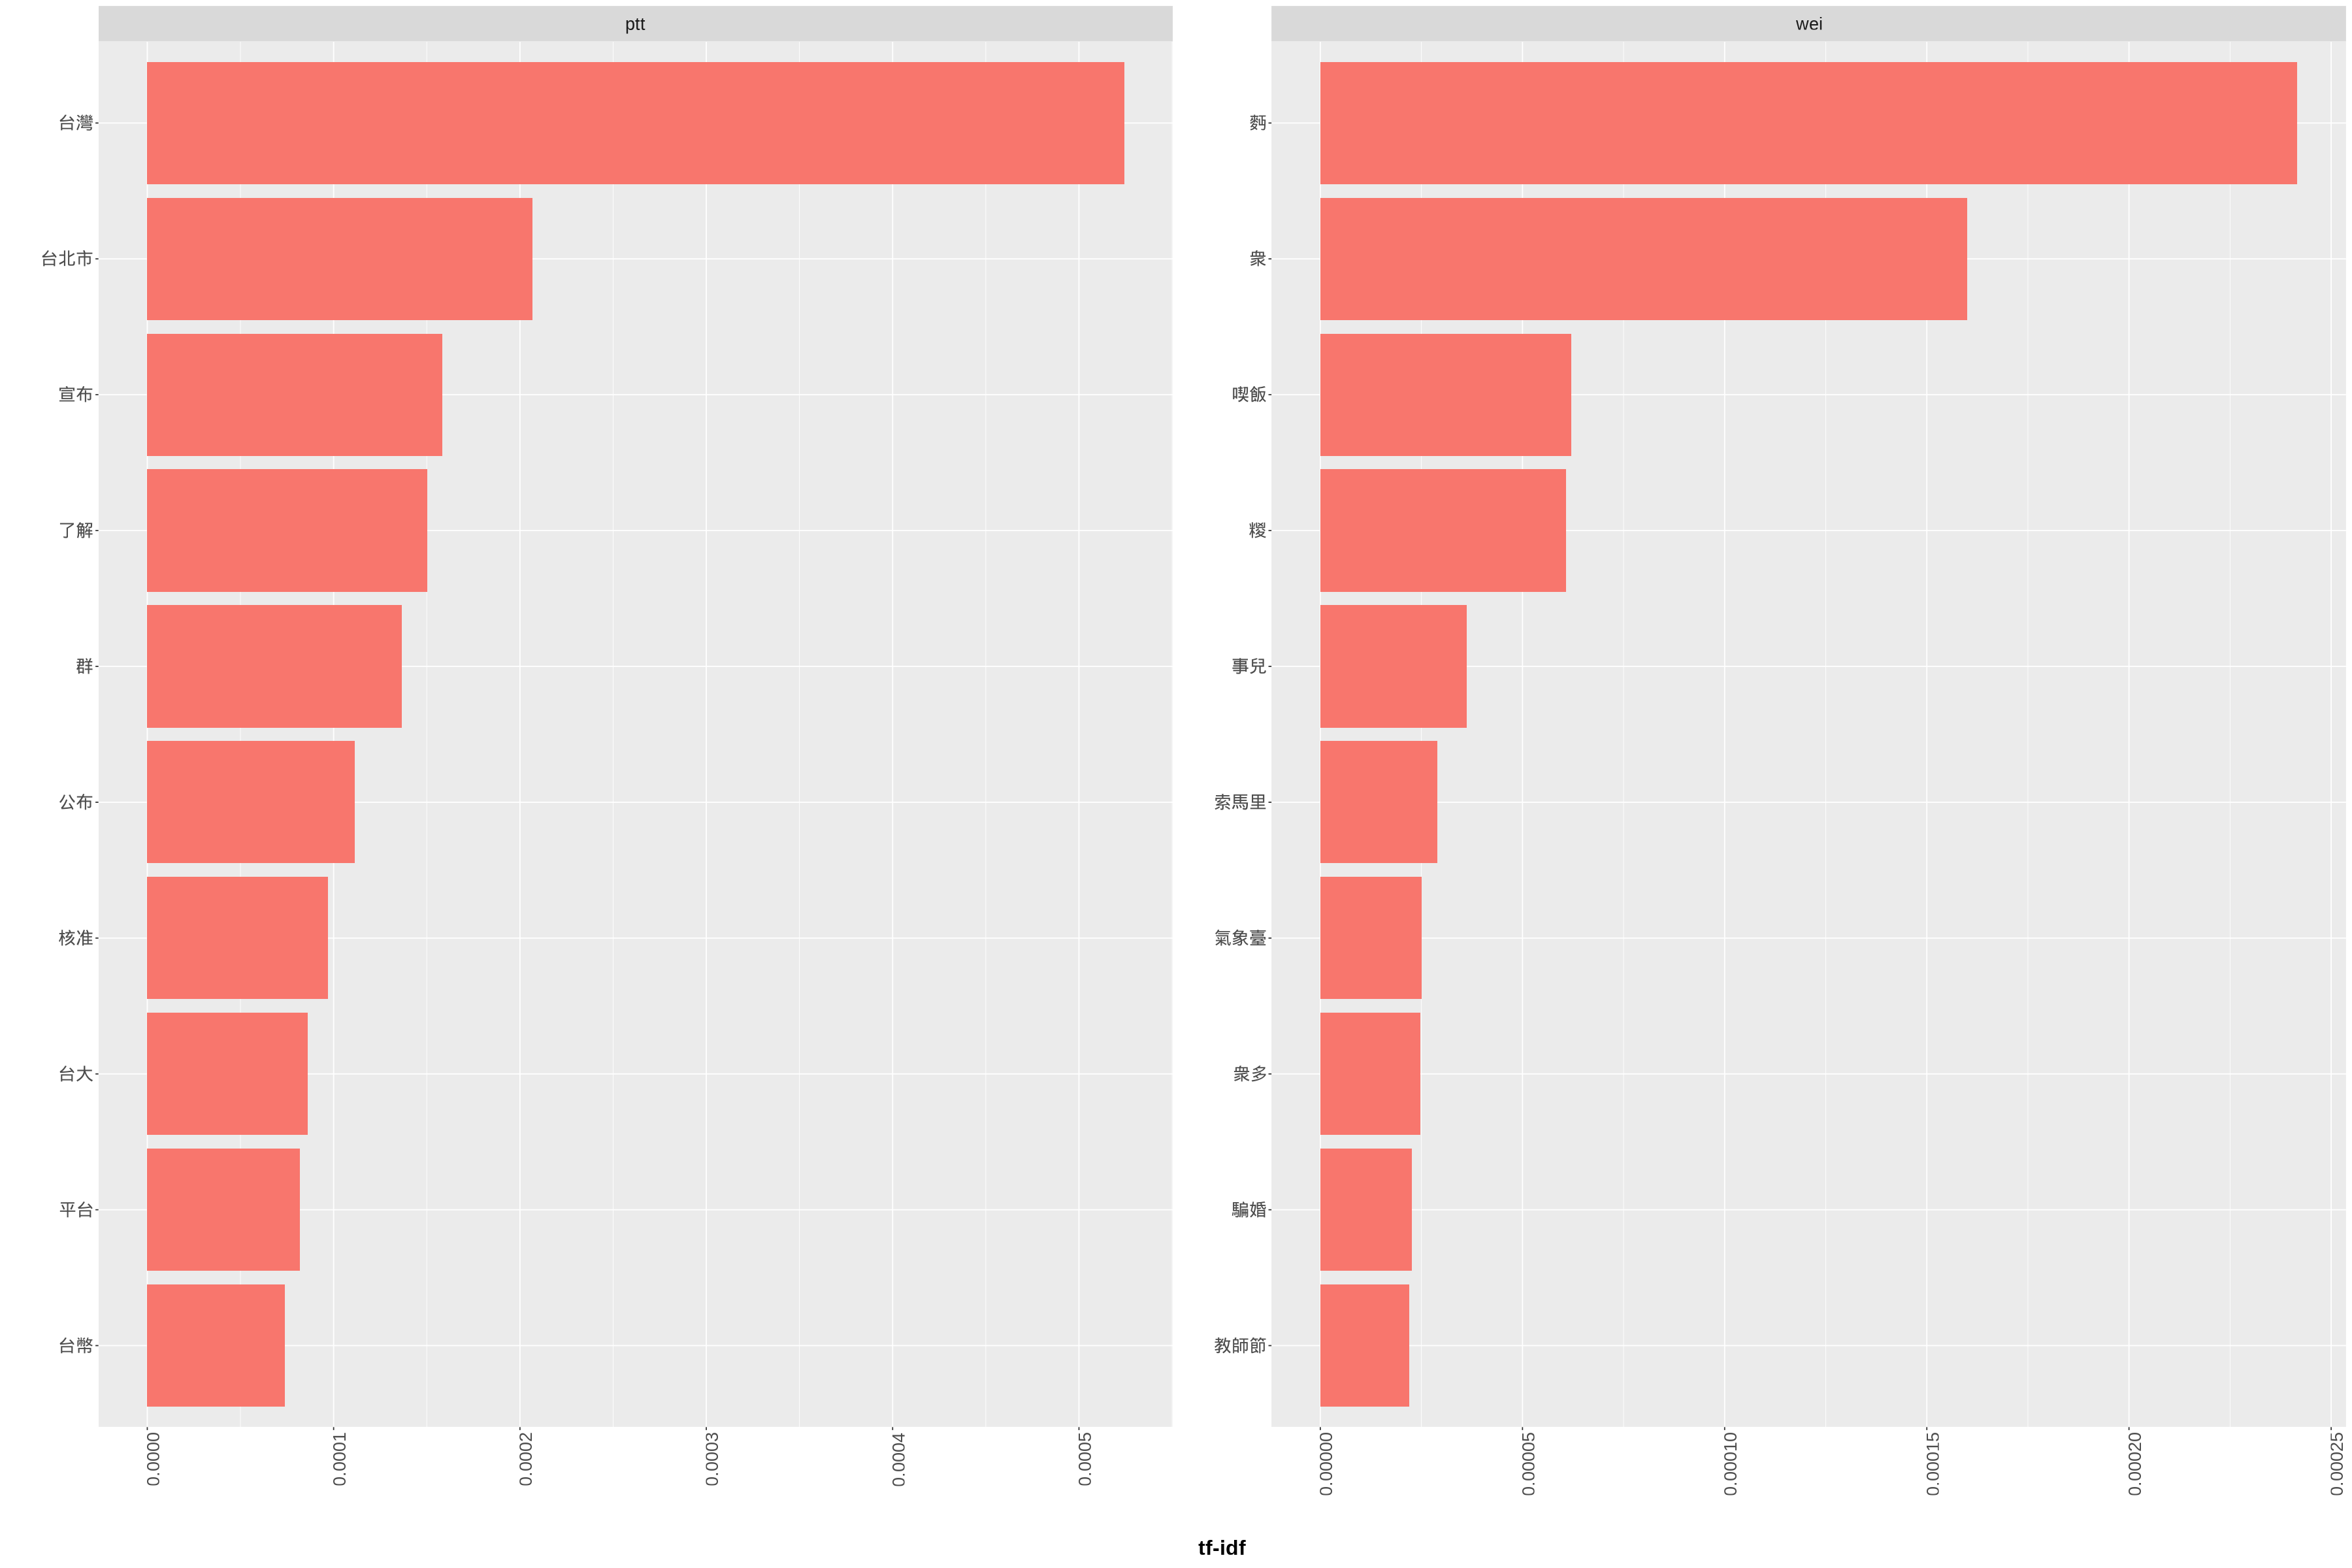

In [ ]:
options(repr.plot.width=30, repr.plot.height=20)


top_terms_by_topic_tfidf(text_df = example_doc_group, # dataframe
                         text_column = text, # column with text
                         group_column = group, # column with topic label
                         plot = T) # return a plot

In [ ]:

top_terms_by_topic_tfidf <- function(text_df, text_column, group_column, plot = T){
    # name for the column we're going to unnest_tokens_ to
    # (you only need to worry about enquo stuff if you're
    # writing a function using using tidyverse packages)
    group_column <- enquo(group_column)
    text_column <- enquo(text_column)
    
    # get the count of each word in each review
    words <- text_df %>%
      unnest_tokens(word, !!text_column) %>%
      count(!!group_column, word) %>% 
      ungroup()

    # get the number of words per text
    total_words <- words %>% 
      group_by(!!group_column) %>% 
      summarize(total = sum(n))

    # combine the two dataframes we just made
    words <- left_join(words, total_words)

    # get the tf_idf & order the words by degree of relevence
    tf_idf <- words %>%
      bind_tf_idf(word, !!group_column, n) %>%
      select(-total) %>%
      arrange(desc(tf_idf)) %>%
      mutate(word = factor(word, levels = rev(unique(word))))
    
    if(plot == T){
        # convert "group" into a quote of a name
        # (this is due to funkiness with calling ggplot2
        # in functions)
        group_name <- quo_name(group_column)
        
        # plot the 10 most informative terms per topic
        tf_idf %>% 
          group_by(!!group_column) %>% 
          top_n(10) %>% 
          ungroup %>%
          ggplot(aes(word, tf_idf, fill = as.factor(group_name))) +
          geom_col(show.legend = FALSE) +
          labs(x = NULL, y = "tf-idf") +
          theme(text = element_text(size=25),axis.title=element_text(size=24,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1)) +
          facet_wrap(reformulate(group_name), scales = "free") +
          coord_flip()
    }else{
        # return the entire tf_idf dataframe
        return(tf_idf)
    }
}




In [ ]:
example_doc_group<- doc_dtm_group[exampleIds,]

In [ ]:
example_doc_group <- doc_dtm %>% group_by(group = substr(doc_id, 1, 3)) 

doc_id      
1      weibo_1_T1  
2      weibo_2_T1  
3      weibo_3_T1  
4      weibo_4_T1  
5      weibo_5_T1  
6      weibo_6_T1  
7      weibo_7_T1  
8      weibo_8_T1  
9      weibo_10_T1 
10     weibo_11_T1 
11     weibo_12_T1 
12     weibo_13_T1 
13     weibo_14_T1 
14     weibo_15_T1 
15     weibo_16_T1 
16     weibo_18_T1 
17     weibo_19_T1 
18     weibo_21_T1 
19     weibo_22_T1 
20     weibo_23_T1 
21     weibo_25_T1 
22     weibo_27_T1 
23     weibo_28_T1 
24     weibo_30_T1 
25     weibo_31_T1 
26     weibo_32_T1 
27     weibo_35_T1 
28     weibo_36_T1 
29     weibo_37_T1 
30     weibo_38_T1 
⋮      ⋮           
117888 ptt_31471_T9
117889 ptt_31472_T9
117890 ptt_31473_T9
117891 ptt_31474_T9
117892 ptt_31475_T9
117893 ptt_31476_T9
117894 ptt_31477_T9
117895 ptt_31478_T9
117896 ptt_31479_T9
117897 ptt_31480_T9
117898 ptt_31481_T9
117899 ptt_31482_T9
117900 ptt_31483_T9
117901 ptt_31484_T9
117902 ptt_31485_T9
117903 ptt_31486_T9
117904 ptt_31487_T9
117905 ptt_31488_T9
117906 ptt_31489_T9
117907 ptt_31490_T9
117908 ptt_31491_T9
117909 ptt_31492_T9
117910 ptt_31493_T9
117911 ptt_31494_T9
117912 ptt_31495_T9
117913 ptt_31496_T9
117914 ptt_31497_T9
117915 ptt_31498_T9
117916 ptt_31499_T9
117917 ptt_31500_T9
       text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Joining, by = "time"

Selecting by tf_idf



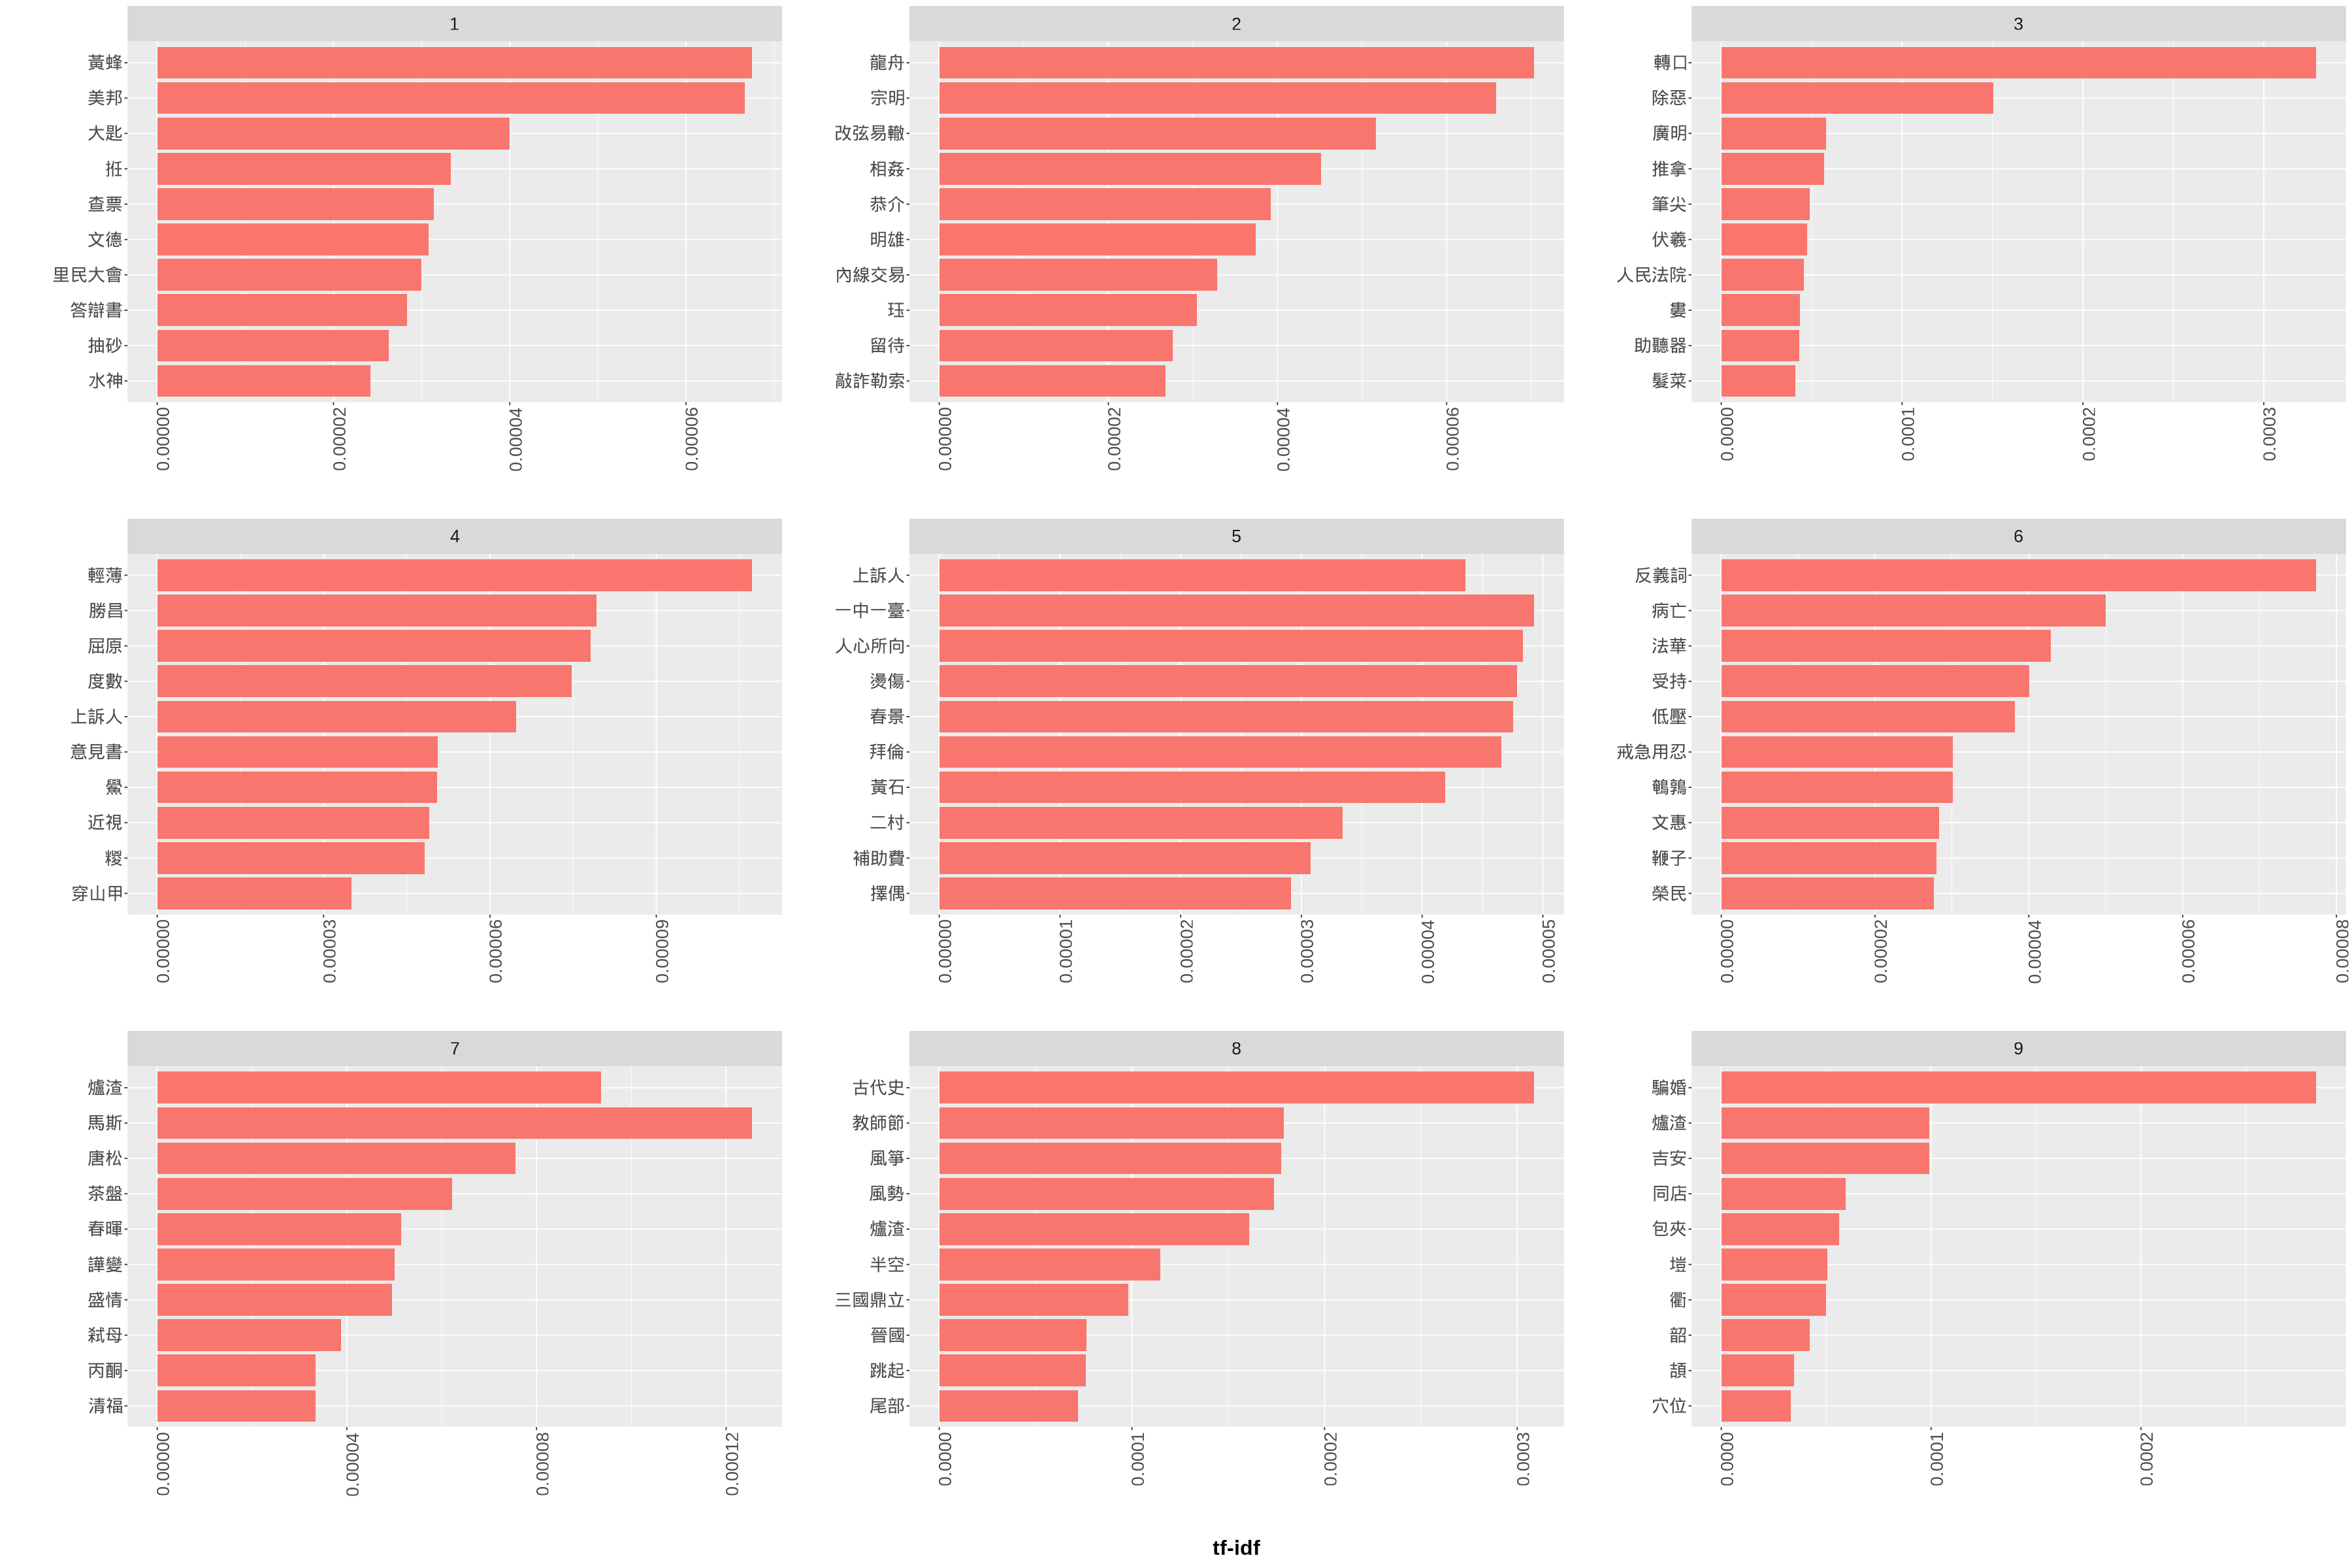

In [ ]:
#台灣 在不同時間點呈現的相關主題詞彙
options(repr.plot.width=30, repr.plot.height=20)


top_terms_by_topic_tfidf(text_df = example_doc_group, # dataframe
                         text_column = text, # column with text
                         group_column = time, # column with topic label
                         plot = T) # return a plot


## 與key word 相關主題中 取樣5篇文章 看各相關主題 在這些文章中的分布

In [ ]:
topicToFilter <- grep('臺灣', topicNames)[1] 
topicThreshold <- 0.2
selectedDocumentIndexes <- which(theta[, topicToFilter] >= topicThreshold)

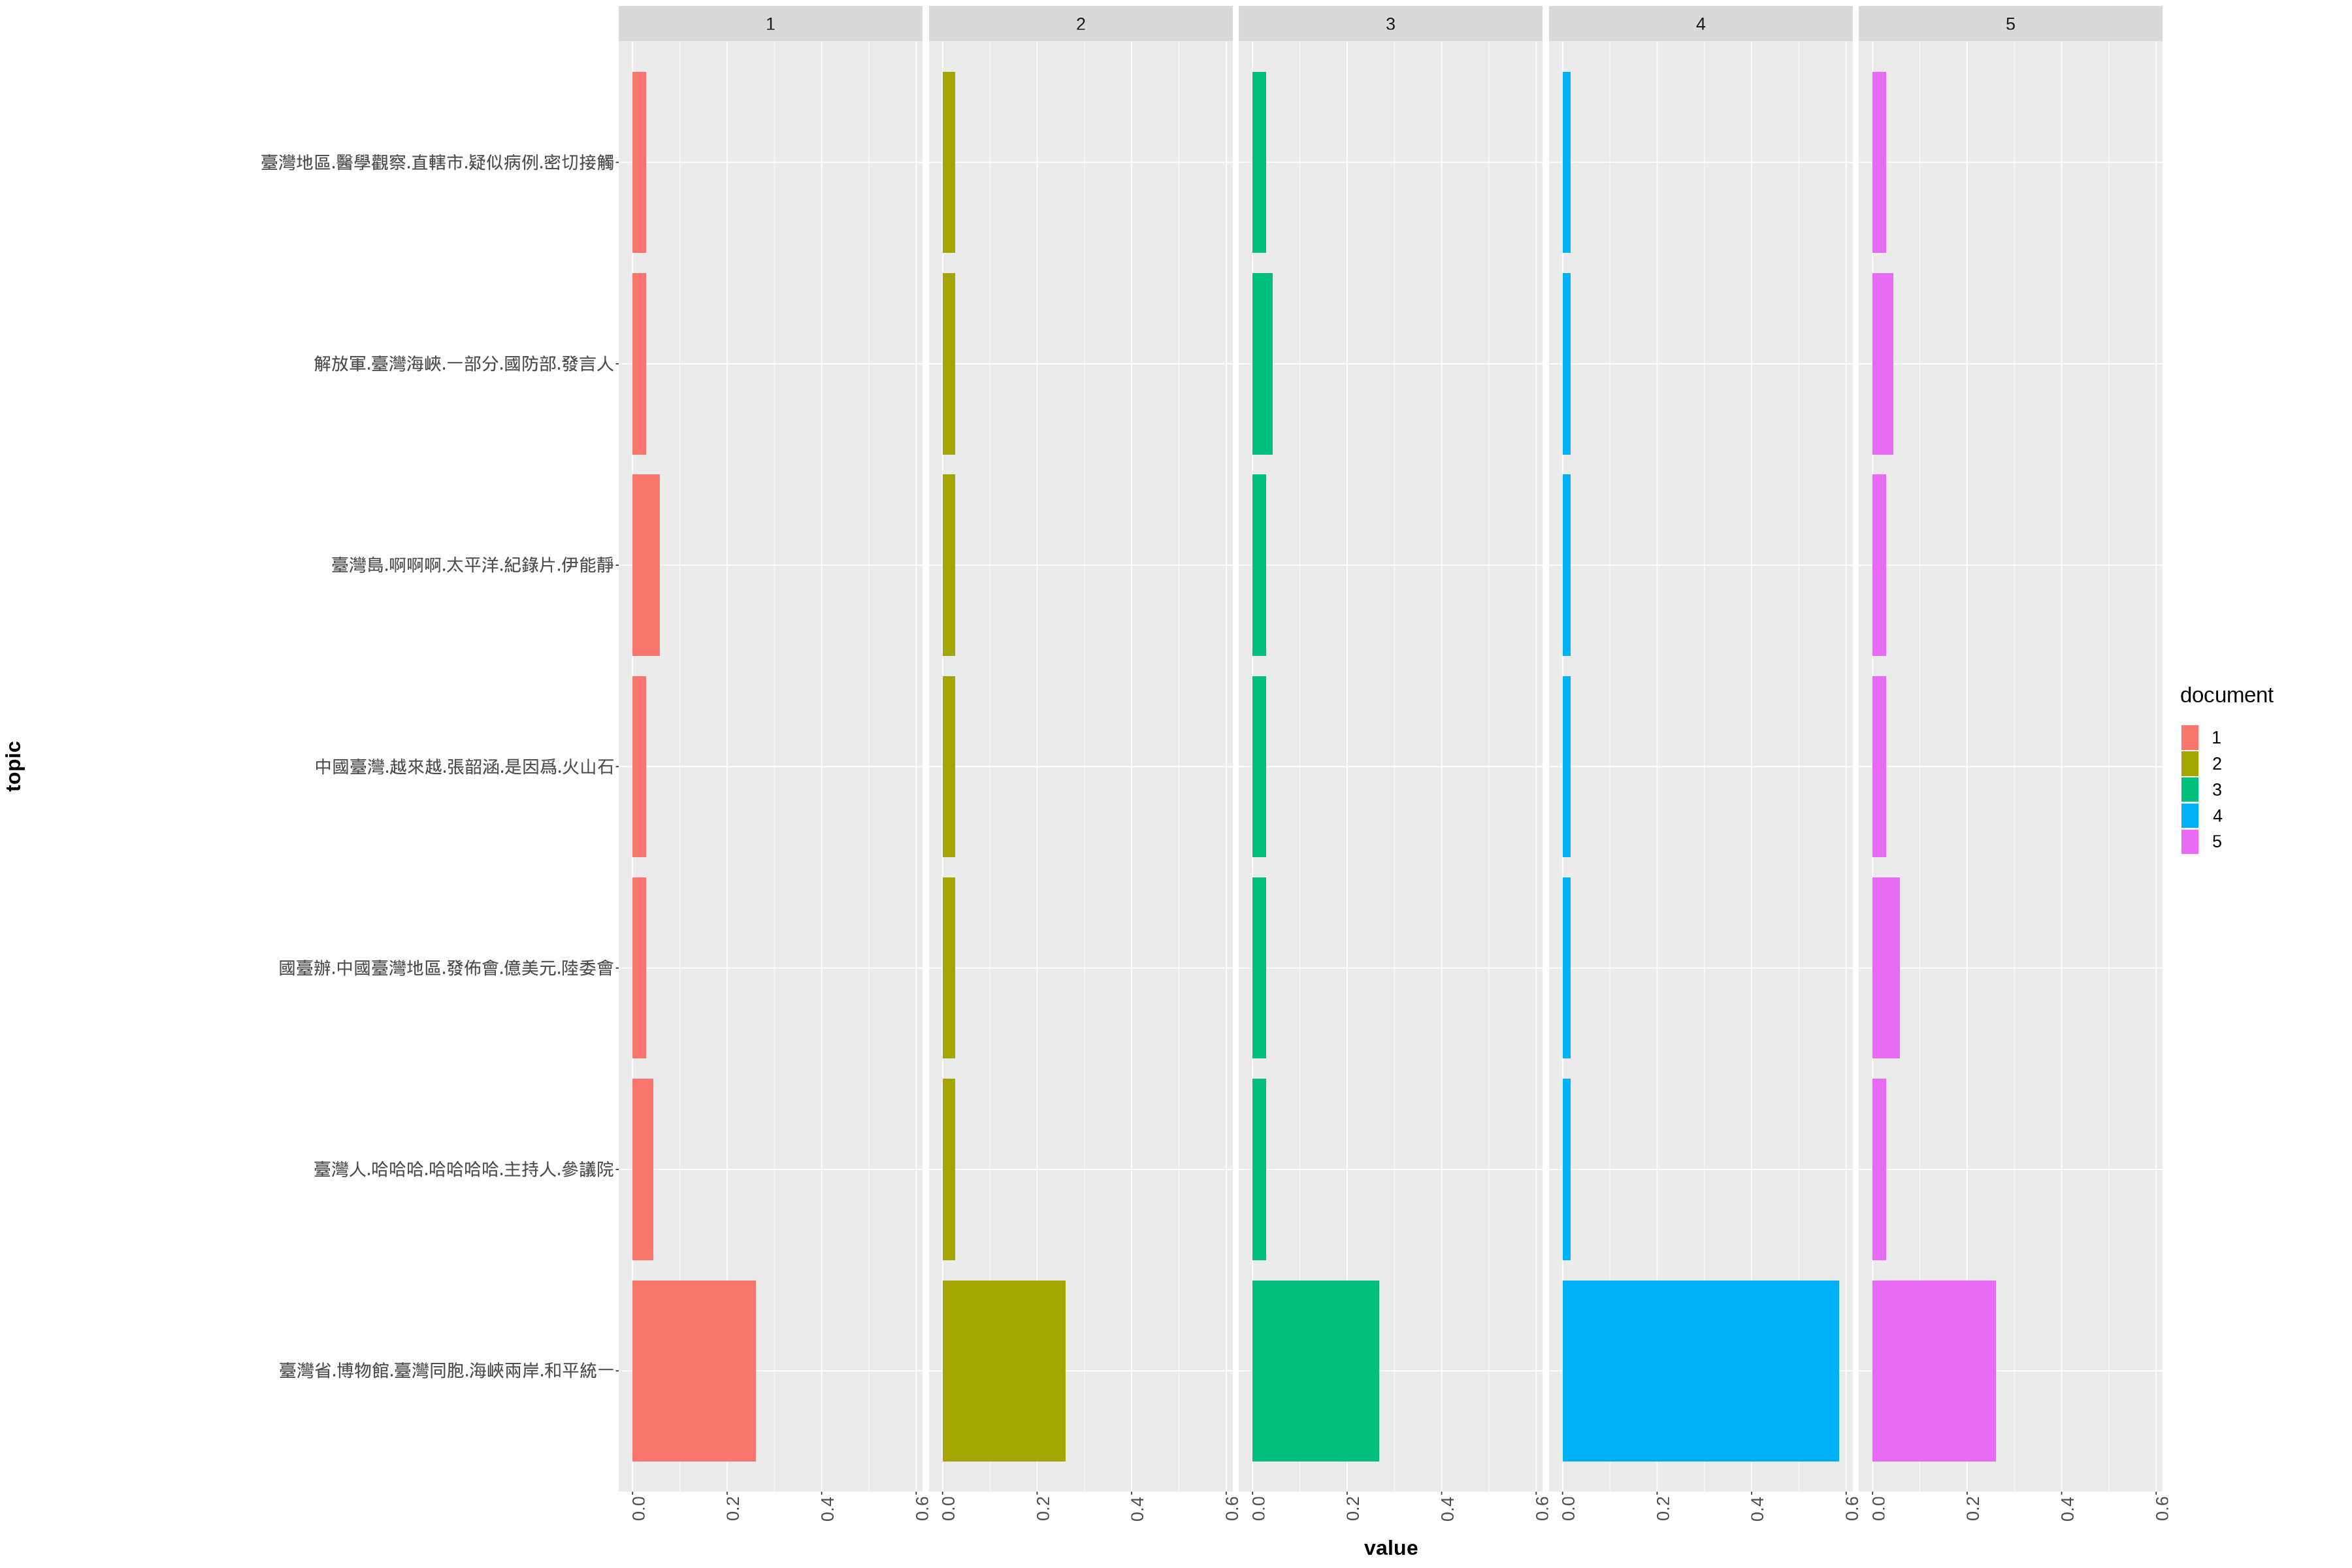

In [ ]:
options(repr.plot.width=30, repr.plot.height=20)
#sample 出 與 臺灣 相關主題中 topic 5 裡面的5篇文章 看這些文章 在與臺灣 相關主題中 主題分布的情形
exampleIds <- sample(selectedDocumentIndexes,5)
N <- length(exampleIds)
# get topic proportions form example documents
topicProportionExamples <- theta[exampleIds,grep('臺灣', topicNames)]
colnames(topicProportionExamples) <- topicNames [grep('臺灣', topicNames)]
vizDataFrame <- melt(cbind(data.frame(topicProportionExamples), document = factor(1:N)), variable.name = "topic", id.vars = "document")  
showtext_auto()
ggplot(data = vizDataFrame, aes(topic, value, fill = document), ylab = "proportion") + 
  geom_bar(stat="identity") +
  theme(text = element_text(size=25),axis.title=element_text(size=24,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1)) +  
  coord_flip() +
  facet_wrap(~ document, ncol = N)

## 與key word 相關主題中 每個topic 相關的文本數量比例 & topic 隨時間的流變

In [ ]:
#每個topic 相關的文本數量比例 以及不同主題的doc數 & doc time or source 比例

#關鍵字選取topic們後, 與關鍵字相關的topic們依照時間流變的圖
#這個時期中各topic的分布 以及 單一topic 隨著時間的流變

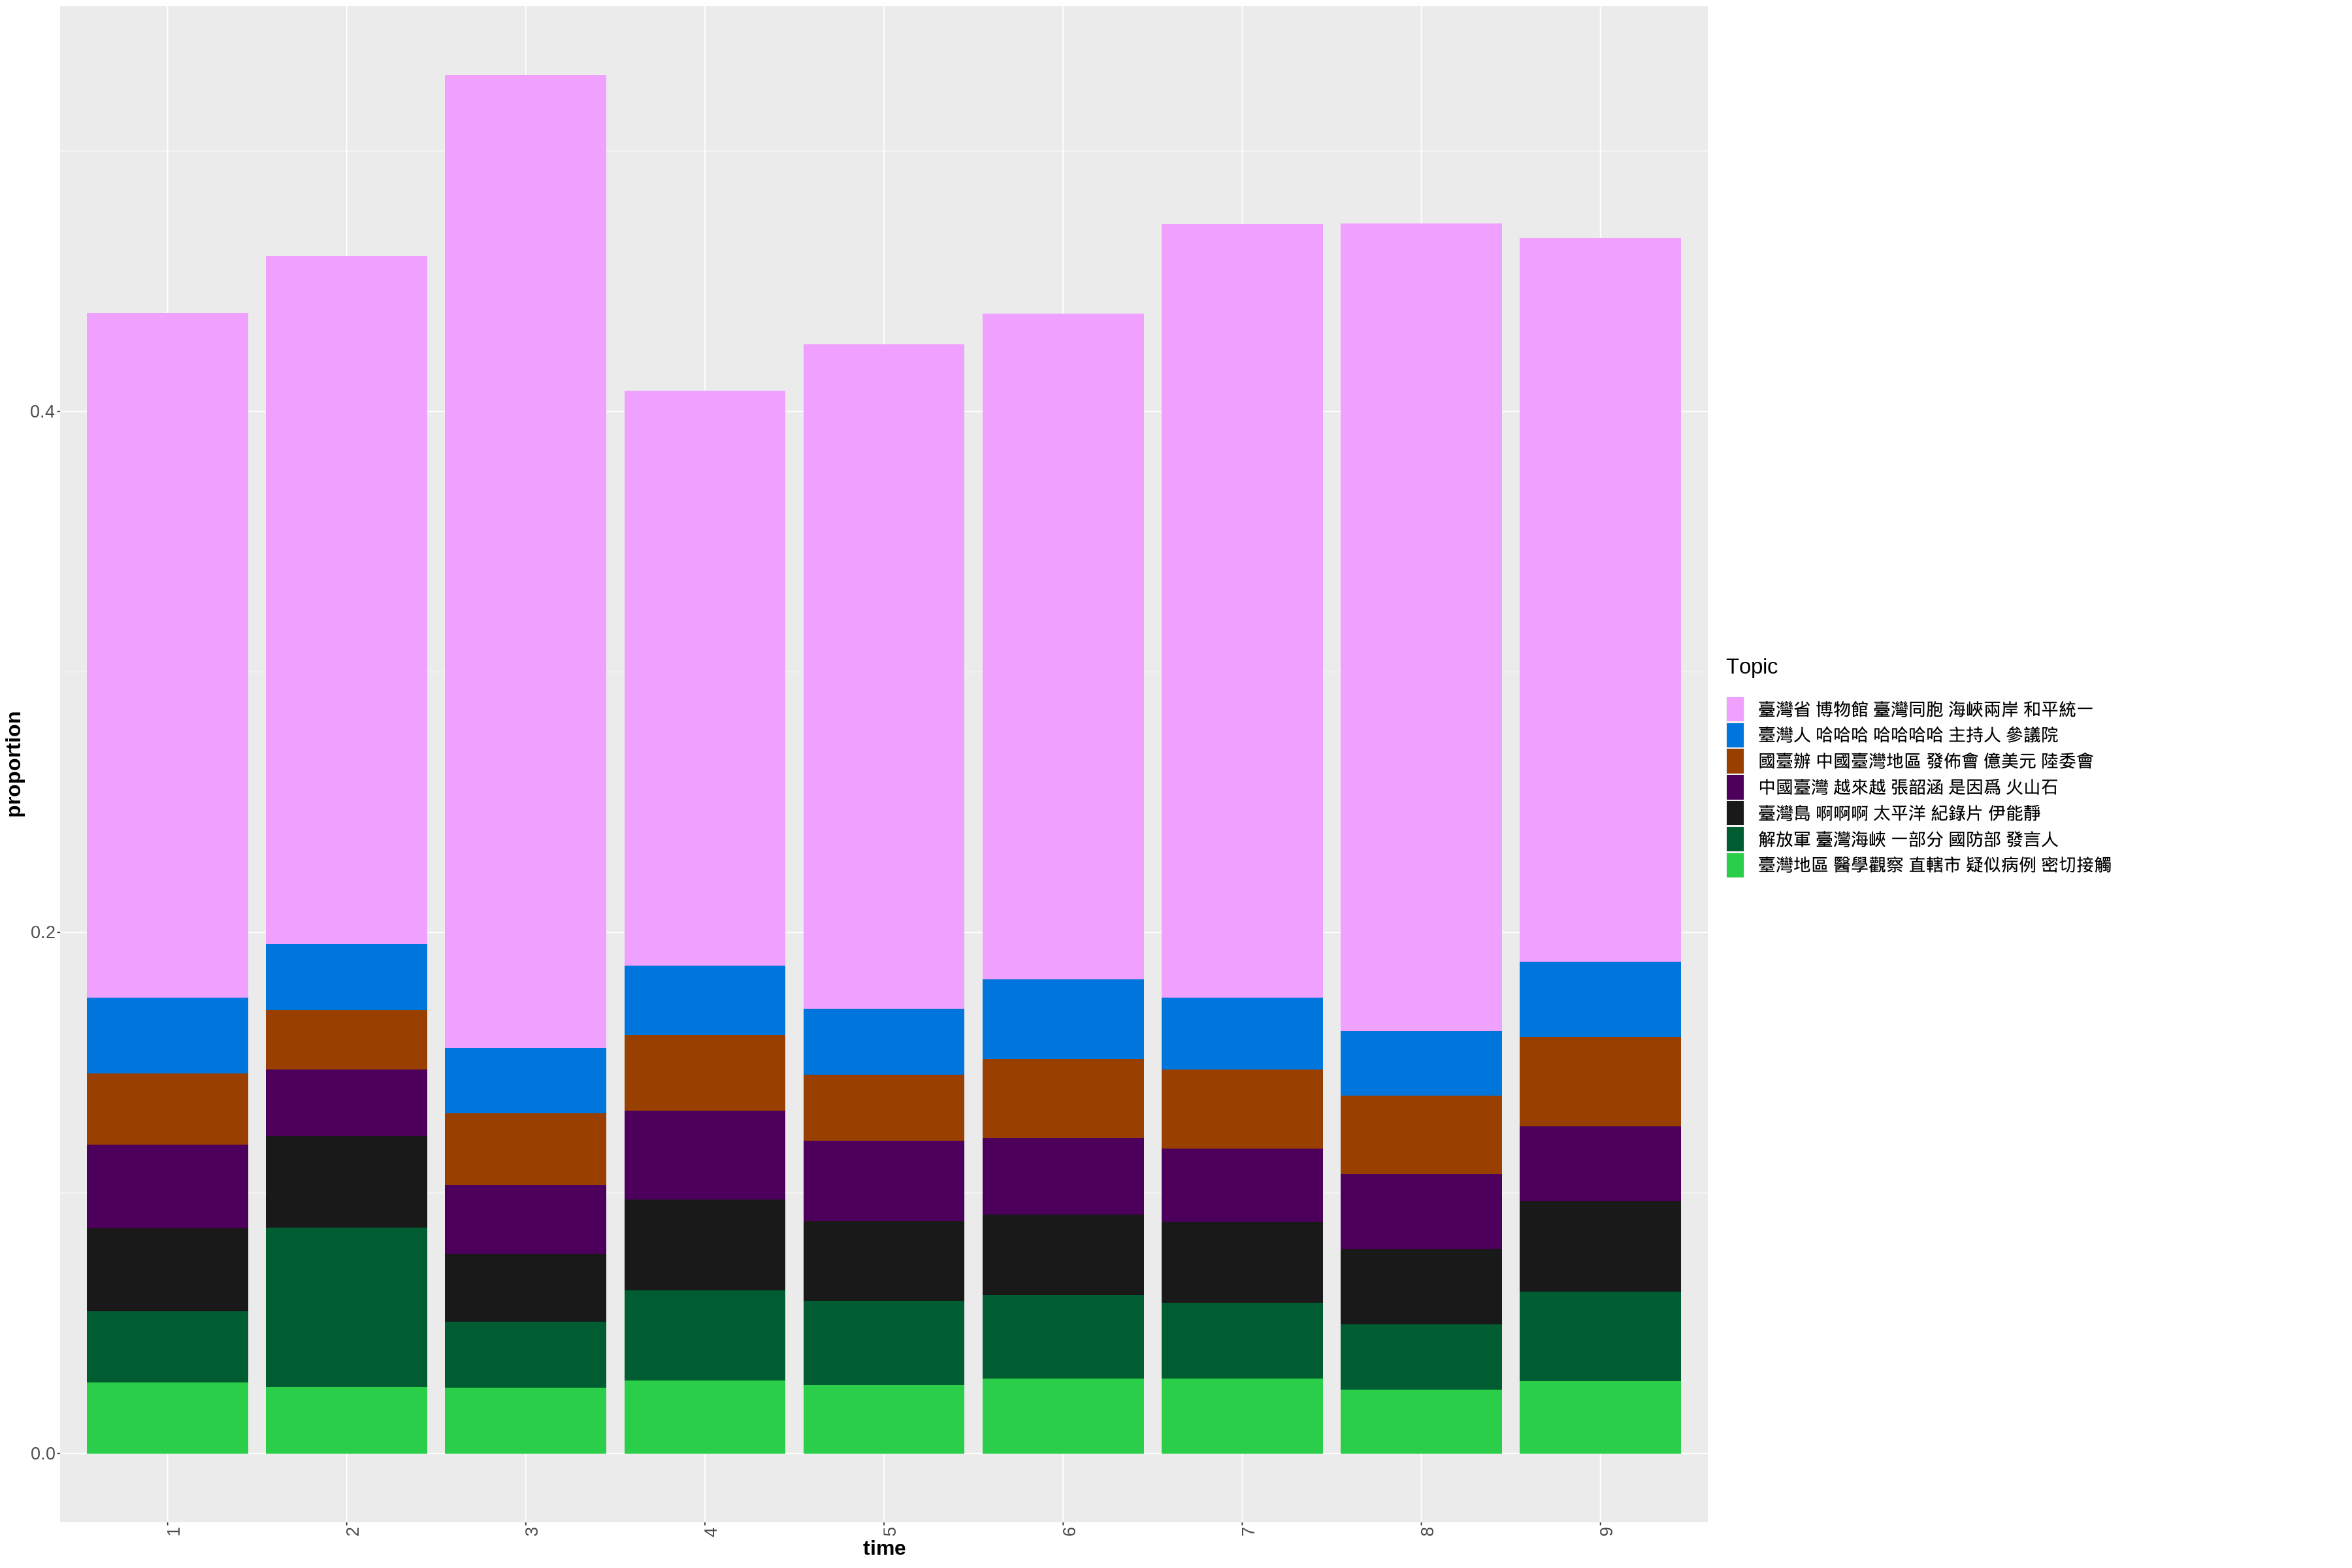

In [ ]:
#get time label
exampleIds <- selectedDocumentIndexes
K = length(topicNames [grep('臺灣', topicNames)])
doc_dtm$time <- substr(doc_dtm$doc_id,nchar(doc_dtm$doc_id),nchar(doc_dtm$doc_id)) 
# get mean topic proportions per decade

topic_proportion_per_time <- aggregate(theta[exampleIds,grep('臺灣', topicNames)], by = list(time = doc_dtm$time[exampleIds]), mean)
# set topic names to aggregated columns
colnames(topic_proportion_per_time)[2:(K+1)] <- topicNames [grep('臺灣', topicNames)]  
# reshape data frame
vizDataFrame <- melt(topic_proportion_per_time, id.vars = "time")
# plot topic proportions per decade as bar plot
# Make plots wider 
options(repr.plot.width=30, repr.plot.height=20)
showtext_auto()
ggplot(vizDataFrame, aes(x=time, y=value, fill=variable)) + 
  geom_bar(stat = "identity") + ylab("proportion") + 
  scale_fill_manual(values = paste0(alphabet(K), "FF"), name = "Topic") +  
  theme(text = element_text(size=25),axis.title=element_text(size=24,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1))